# Project Name : *`Human Emotions Detection`*

**Project Title: Emotion Classification Using Image Data**

### Project Description:
In this project, we aim to develop a machine learning model that classifies emotions displayed in images into three categories: **angry**, **sad**, and **happy**. By leveraging labeled image data sourced from Kaggle, the project focuses on training a model capable of interpreting and categorizing emotions based on facial expressions. This system has broad applications in human-computer interaction, mental health monitoring, and social robotics, where understanding human emotions plays a crucial role.

### Objectives:
1. **Data Collection**:
   The dataset contains labeled images categorized into three classes:
   - **Angry**: Images where the subject displays anger.
   - **Sad**: Images where the subject expresses sadness.
   - **Happy**: Images where the subject appears joyful.

   This data serves as the foundation for training and evaluating the model.

2. **Preprocessing and Data Preparation**:
   - **Image Normalization**: Standardizing pixel values to improve model performance.
   - **Augmentation**: Enhancing the dataset by applying transformations such as rotation, flipping, and zooming to improve the model's ability to generalize.
   - **Class Balancing**: Ensuring that the dataset is balanced across the three classes to prevent bias during training.

3. **Model Development**:
   We will design and train a deep learning model capable of emotion classification. The project will explore different architectures, such as:
   - Convolutional Neural Networks (CNNs): Suitable for extracting spatial features from images.
   - Pretrained Models (e.g., VGG, ResNet, EfficientNet): Leveraging transfer learning to improve accuracy and reduce training time.

4. **Evaluation Metrics**:
   The model's performance will be assessed using:
   - **Accuracy**: Overall percentage of correct predictions.
   - **Precision, Recall, and F1-Score**: Class-specific metrics to evaluate performance in imbalanced scenarios.
   - **Confusion Matrix**: For detailed insights into misclassifications.

5. **Deployment**:
   Once the model is trained and evaluated, it will be packaged into a user-friendly application for real-time emotion classification. This may involve deploying the model using platforms like Flask, Gradio, or Streamlit.

### Challenges and Considerations:
- **Variability in Facial Expressions**: Differences in lighting, angle, and individual facial features can affect model performance.
- **Class Imbalance**: If one emotion class dominates the dataset, it may skew the model's predictions.
- **Overfitting**: Risk of overfitting due to limited variability in the training data.
- **Generalization**: Ensuring the model performs well on unseen data.

### Expected Outcomes:
1. A robust model capable of classifying emotions into **angry**, **sad**, or **happy** with high accuracy.
2. Insights into the most significant features or patterns associated with each emotion.
3. A deployable application for real-time emotion recognition, with potential integration into broader systems like mental health monitoring or customer feedback analysis.

### Applications:
- **Mental Health**: Automated emotion detection for identifying individuals in distress.
- **Education**: Understanding student emotions in online learning environments.
- **Customer Interaction**: Enhancing user experience by adapting systems based on emotional cues.
- **Entertainment**: Personalizing content recommendations based on viewer emotions.

This project not only addresses a fascinating computer vision challenge but also contributes to real-world applications where emotional understanding is pivotal.



## 1. Make necessary imports
Let's import the required libaries for performing this task.

In [1]:
!wget 'https://github.com/krutika-shimpi/Human_Emotion_Detection_Project/raw/main/helper_functions.py'

--2025-02-27 12:16:11--  https://github.com/krutika-shimpi/Human_Emotion_Detection_Project/raw/main/helper_functions.py
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/krutika-shimpi/Human_Emotion_Detection_Project/main/helper_functions.py [following]
--2025-02-27 12:16:11--  https://raw.githubusercontent.com/krutika-shimpi/Human_Emotion_Detection_Project/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12867 (13K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  12.57K  --.-KB/s    in 0s      

2025-02-27 12:16:12 (88.6 M

In [2]:
from helper_functions import make_confusion_matrix, plot_loss_curves
import tensorflow as tf### models
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
import sklearn### machine learning library
import cv2## image processing
from sklearn.metrics import confusion_matrix, roc_curve### metrics
import seaborn as sns### visualizations
import datetime
import pathlib
import io
import os
import json
import time
import random
import pandas
from google.colab import files
from PIL import Image
import albumentations as A
import tensorflow_datasets as tfds
import tensorflow_probability as tfp
import matplotlib.cm as cm
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import (GlobalAveragePooling2D, Activation, MaxPooling2D, Add, Conv2D, MaxPool2D, Dense,
                                     Flatten, InputLayer, BatchNormalization, Input, Embedding, Permute,
                                     Dropout, RandomFlip, RandomRotation, LayerNormalization, MultiHeadAttention,
                                     RandomContrast, Rescaling, Resizing, Reshape)
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy,TopKCategoricalAccuracy, CategoricalAccuracy, SparseCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (Callback, CSVLogger, EarlyStopping, LearningRateScheduler,
                                        ModelCheckpoint, ReduceLROnPlateau)
from tensorflow.keras.regularizers  import L2, L1
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Example, Features, Feature
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1.1 Setup global variables

Let's set some Global Variables that we will be using throughout the project.

In [3]:
# Setup some global variables that we will be using throughout
CLASS_NAMES = ['angry', 'happy','sad']
CONFIGURATION = {
    "BATCH_SIZE": 32,
    "IM_SIZE": 256,
    "LEARNING_RATE": 1e-3,
    "N_EPOCHS": 20,
    "DROPOUT_RATE": 0.0,
    "REGULARIZATION_RATE": 0.0,
    "N_FILTERS": 6,
    "KERNEL_SIZE": 3,
    "N_STRIDES": 1,
    "POOL_SIZE": 2,
    "N_DENSE_1": 1024,
    "N_DENSE_2": 128,
    "NUM_CLASSES": 3,
    "PATCH_SIZE": 16,
    "PROJ_DIM": 768,
    "CLASS_NAMES": ["angry", "happy", "sad"],
}

## 2. Get the Data

The dataset is provided on Kaggle by Mohammed Muhammadhananasghar. Please find the link below:

Dataset URL: https://www.kaggle.com/datasets/muhammadhananasghar/human-emotions-datasethes

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d muhammadhananasghar/human-emotions-datasethes

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/muhammadhananasghar/human-emotions-datasethes
License(s): unknown
 99% 307M/309M [00:15<00:00, 23.0MB/s]
100% 309M/309M [00:15<00:00, 21.2MB/s]


In [5]:
!unzip "/content/human-emotions-datasethes.zip"

Streaming output truncated to the last 5000 lines.
  inflating: EmotionsDataset/data/nothing/720.jpg  
  inflating: EmotionsDataset/data/nothing/721.jpg  
  inflating: EmotionsDataset/data/nothing/722.jpg  
  inflating: EmotionsDataset/data/nothing/723.jpg  
  inflating: EmotionsDataset/data/nothing/724.jpg  
  inflating: EmotionsDataset/data/nothing/725.jpg  
  inflating: EmotionsDataset/data/nothing/726.jpg  
  inflating: EmotionsDataset/data/nothing/727.jpg  
  inflating: EmotionsDataset/data/nothing/728.jpg  
  inflating: EmotionsDataset/data/nothing/729.jpg  
  inflating: EmotionsDataset/data/nothing/73.jpg  
  inflating: EmotionsDataset/data/nothing/730.jpg  
  inflating: EmotionsDataset/data/nothing/731.jpg  
  inflating: EmotionsDataset/data/nothing/732.jpg  
  inflating: EmotionsDataset/data/nothing/733.jpg  
  inflating: EmotionsDataset/data/nothing/734.jpg  
  inflating: EmotionsDataset/data/nothing/735.jpg  
  inflating: EmotionsDataset/data/nothing/736.jpg  
  inflating: E

## 3. Creating TensorFlow datasets

We will create a TensorFlow dataset from our image data using the `tf.keras.utils.image_dataset_from_directory` function, which efficiently loads and preprocesses image files directly from the directory structure.

This function will automatically label the images based on their folder names, making it convenient for training and validation processes.

In [6]:
# Setup train and val dir
train_dir =  '/content/Emotions Dataset/Emotions Dataset/train'
val_dir = '/content/Emotions Dataset/Emotions Dataset/test'

In [7]:
# Create the train dataset using the `tf.keras.utils.image_dataset_from_directory` for efficiently loading the data
train_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    directory = train_dir,
    labels ='inferred', # The emotion class will be inferred from the directory name
    label_mode = 'categorical', # Use integer encoding for output classes if set as 'int' (angry, happy, sad), categorical will use onehot representation
    class_names = CONFIGURATION['CLASS_NAMES'],
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (256, 256),
    shuffle = True,
    seed = 99
)

# Create the val dataset in the same way
val_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    directory = val_dir,
    labels ='inferred', # The emotion class will be inferred from the directory name
    label_mode = 'categorical', # categorical will use onehot representation
    class_names = CONFIGURATION['CLASS_NAMES'],
    color_mode = 'rgb',
    batch_size = CONFIGURATION['BATCH_SIZE'],
    image_size = (CONFIGURATION['IM_SIZE'], CONFIGURATION['IM_SIZE']),
    shuffle = True,
    seed = 99
)

Found 6799 files belonging to 3 classes.
Found 2278 files belonging to 3 classes.


In [8]:

for i in train_dataset.take(1):
  print(i)

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[115.       , 115.       , 115.       ],
         [110.9375   , 110.9375   , 110.9375   ],
         [111.375    , 111.375    , 111.375    ],
         ...,
         [ 40.3125   ,  40.3125   ,  40.3125   ],
         [ 41.1875   ,  41.1875   ,  41.1875   ],
         [ 42.       ,  42.       ,  42.       ]],

        [[115.       , 115.       , 115.       ],
         [112.25781  , 112.25781  , 112.25781  ],
         [110.765625 , 110.765625 , 110.765625 ],
         ...,
         [ 41.683594 ,  41.683594 ,  41.683594 ],
         [ 41.847656 ,  41.847656 ,  41.847656 ],
         [ 42.       ,  42.       ,  42.       ]],

        [[115.6875   , 115.6875   , 115.6875   ],
         [113.80859  , 113.80859  , 113.80859  ],
         [110.58203  , 110.58203  , 110.58203  ],
         ...,
         [ 41.570312 ,  41.570312 ,  41.570312 ],
         [ 40.496094 ,  40.496094 ,  40.496094 ],
         [ 39.9375   ,  39.9375   ,  39.9375

## 4. Visualize, visualize & visualize.

Now that we have converted our data into TensorFlow Dataset, let's explore the dataset by visualizing it.

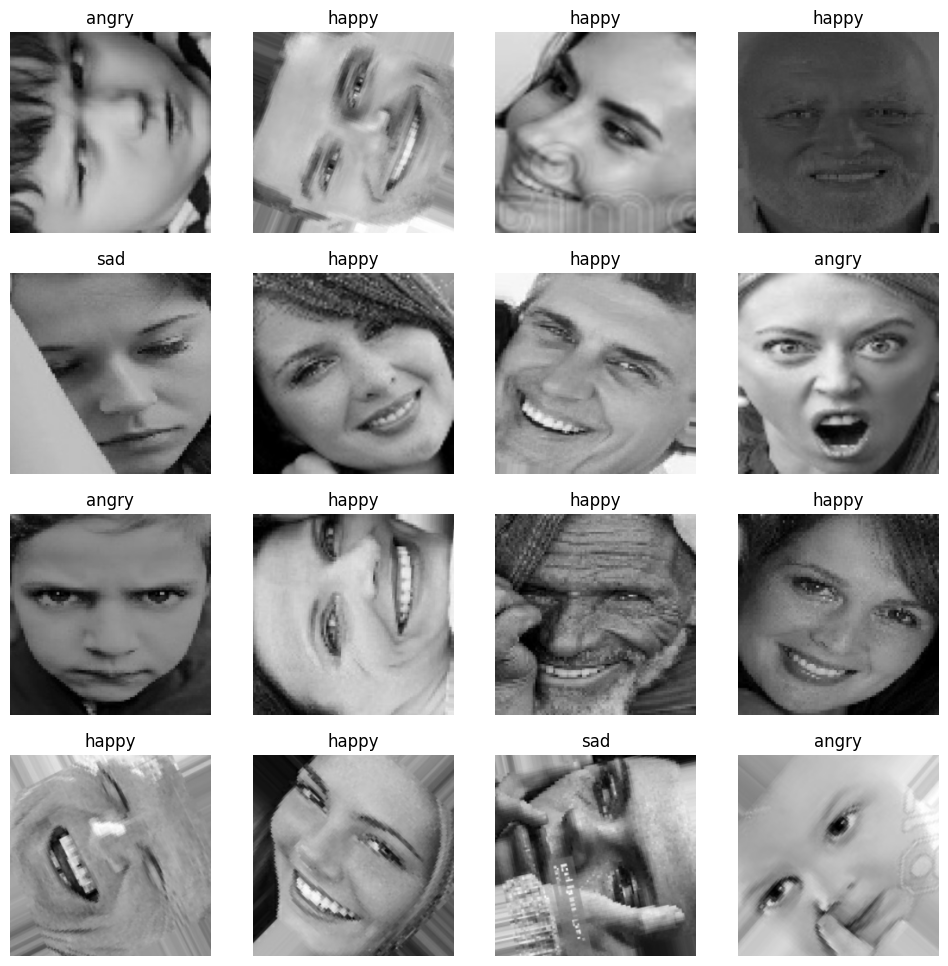

In [9]:
plt.figure(figsize = (12, 12))
for images, labels in train_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4,4, i+1)
    plt.imshow(images[i]/255.)
    plt.title(CLASS_NAMES[tf.argmax(labels[i], axis = 0).numpy()])
    plt.axis('off')

## 5. Prepare Data

In [10]:
# Prepare efficient data pipelines without any data augmentation
train_data = train_dataset.prefetch(tf.data.AUTOTUNE)
val_data = val_dataset.prefetch(tf.data.AUTOTUNE)

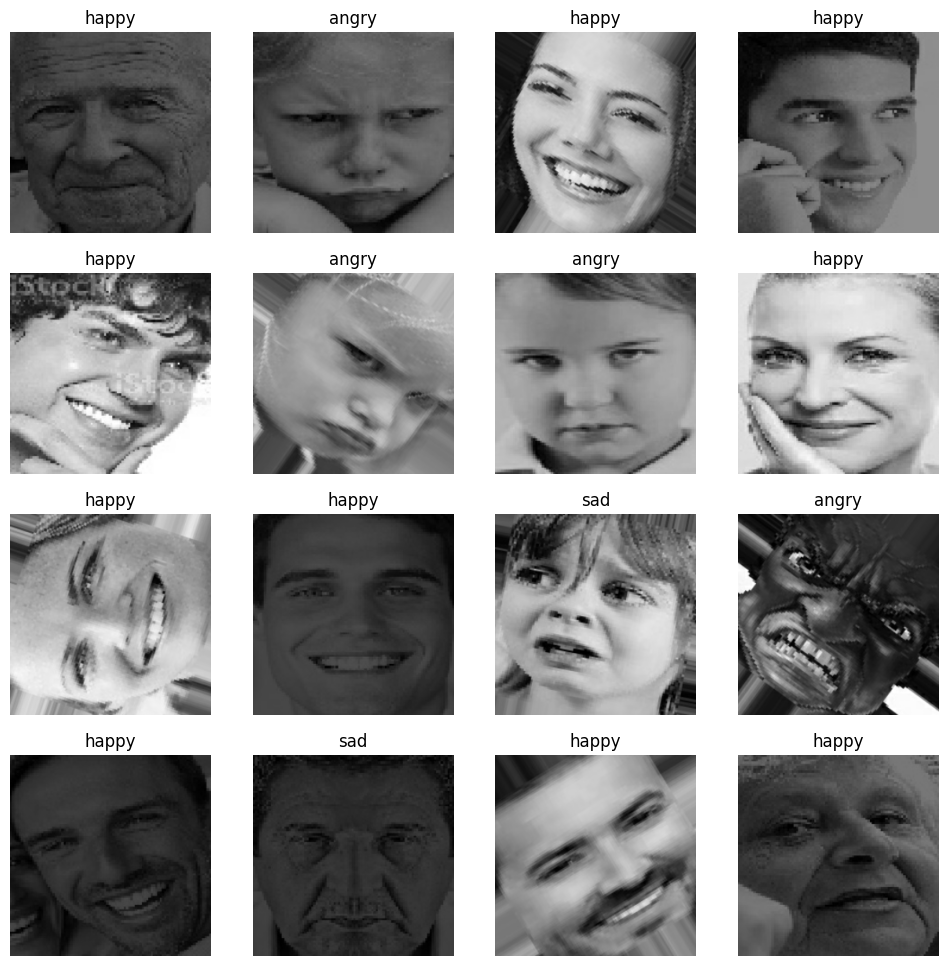

In [11]:
plt.figure(figsize = (12, 12))
for images, labels in train_data.take(1):
  for i in range(16):
    ax = plt.subplot(4,4, i+1)
    plt.imshow(images[i]/255.)
    plt.title(CLASS_NAMES[tf.argmax(labels[i], axis = 0).numpy()])
    plt.axis('off')

## 6. Data Augmentation

Let's apply data augmentation to reduce the model's overfitting.

### 6.1. Data Augmentation Layer

This layer enhances model generalization by applying data augmentation techniques to input images. It introduces random transformations, including horizontal flipping, slight rotations, and contrast adjustments, to simulate variations in real-world data. These augmentations help improve robustness by preventing overfitting and enabling the model to learn invariant features.


`@tf.function` Decorator

This converts the function into a TensorFlow graph for optimization.
It speeds up execution by compiling it into a TensorFlow graph.

In [12]:

# Setup a resize and rescale layer
resize_rescaling_layers = tf.keras.Sequential([
    Resizing(CONFIGURATION['IM_SIZE'], CONFIGURATION['IM_SIZE']),
    Rescaling(1./255)
])

# Create a data augmentation layer using TensorFlow
data_augment_layers = tf.keras.Sequential([
    RandomRotation(factor = (-0.025, 0.025)),
    RandomFlip('horizontal',),
    RandomContrast(factor=0.1)
])

@tf.function
def augment_layer(image, label):
  return data_augment_layers(resize_rescaling_layers(image), training = True), label

#### 6.1.1. Data Preparation

Prepare efficient data pipelines for training.bold text

In [13]:
# Prepare efficient data pipelines
train_data_augment = train_dataset.map(augment_layer, num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
val_data_augment = val_dataset.prefetch(tf.data.AUTOTUNE)

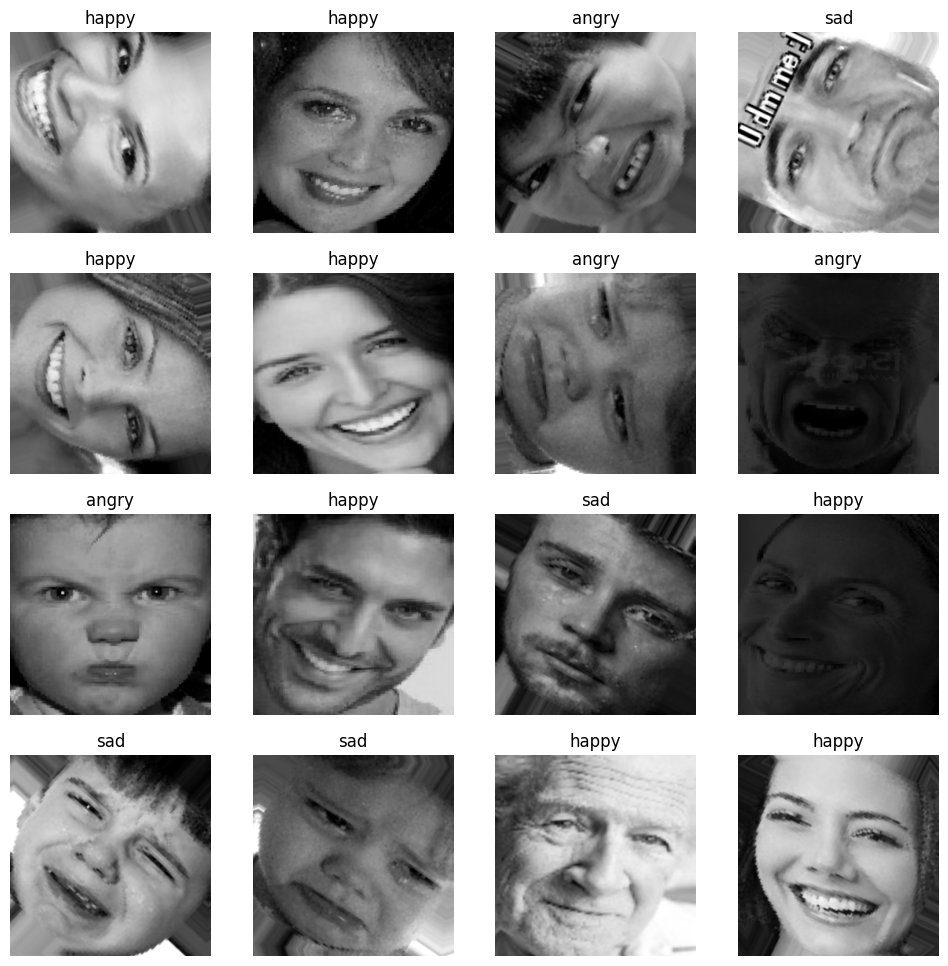

In [ ]:
plt.figure(figsize = (12, 12))
for images, labels in train_data_augment.take(1):
  for i in range(16):
    ax = plt.subplot(4,4, i+1)
    plt.imshow(tf.clip_by_value(images[i], 0, 1))  # Ensures values stay in [0,1]
    plt.title(CLASS_NAMES[tf.argmax(labels[i], axis = 0).numpy()])
    plt.axis('off')

### 6.2 Cutmix Data Augmentation

**CutMix Data Augmentation** is a technique that enhances model generalization by mixing two training images and their corresponding labels. Instead of simply overlaying images, CutMix replaces a randomly selected region of one image with a patch from another. The labels are adjusted proportionally based on the area of the mixed regions. This method encourages the model to learn better feature representations by exposing it to partial object occlusions and diverse backgrounds, improving robustness and reducing overfitting.

In [ ]:
# Defining the bounding box function for cutmix augmentation
def box(lamda):

  r_x = tf.cast(tfp.distributions.Uniform(0, CONFIGURATION["IM_SIZE"]).sample(1)[0], dtype = tf.int32)
  r_y = tf.cast(tfp.distributions.Uniform(0, CONFIGURATION["IM_SIZE"]).sample(1)[0], dtype = tf.int32)

  r_w = tf.cast(CONFIGURATION["IM_SIZE"]*tf.math.sqrt(1-lamda), dtype = tf.int32)
  r_h = tf.cast(CONFIGURATION["IM_SIZE"]*tf.math.sqrt(1-lamda), dtype = tf.int32)

  r_x = tf.clip_by_value(r_x - r_w//2, 0, CONFIGURATION["IM_SIZE"])
  r_y = tf.clip_by_value(r_y - r_h//2, 0, CONFIGURATION["IM_SIZE"])

  x_b_r = tf.clip_by_value(r_x + r_w//2, 0, CONFIGURATION["IM_SIZE"])
  y_b_r = tf.clip_by_value(r_y + r_h//2, 0, CONFIGURATION["IM_SIZE"])

  r_w = x_b_r - r_x
  if(r_w == 0):
    r_w  = 1

  r_h = y_b_r - r_y
  if(r_h == 0):
    r_h = 1

  return r_y, r_x, r_h, r_w

In [ ]:
def cutmix(train_dataset_1, train_dataset_2):
  (image_1,label_1), (image_2, label_2) = train_dataset_1, train_dataset_2

  lamda = tfp.distributions.Beta(2,2)
  lamda = lamda.sample(1)[0]

  r_y, r_x, r_h, r_w = box(lamda)
  crop_2 = tf.image.crop_to_bounding_box(image_2, r_y, r_x, r_h, r_w)
  pad_2 = tf.image.pad_to_bounding_box(crop_2, r_y, r_x, CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"])

  crop_1 = tf.image.crop_to_bounding_box(image_1, r_y, r_x, r_h, r_w)
  pad_1 = tf.image.pad_to_bounding_box(crop_1, r_y, r_x, CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"])

  image = image_1 - pad_1 + pad_2

  lamda = tf.cast(1- (r_w*r_h)/(CONFIGURATION["IM_SIZE"]*CONFIGURATION["IM_SIZE"]), dtype = tf.float32)
  label = lamda*tf.cast(label_1, dtype = tf.float32) + (1-lamda)*tf.cast(label_2, dtype = tf.float32)

  return image, label

#### 6.2.1. Data Preparation

Data Preparation for cutmix augmentation

In [ ]:
# Prepare the data for cutmix
train_dataset_1 = train_dataset.map(augment_layer, num_parallel_calls = tf.data.AUTOTUNE)
train_dataset_2 = train_dataset.map(augment_layer, num_parallel_calls = tf.data.AUTOTUNE)

mixed_dataset = tf.data.Dataset.zip((train_dataset_1, train_dataset_2))

In [ ]:
# Applying cutmix augmentation
train_data_cutmix = (
    mixed_dataset
    .map(cutmix, num_parallel_calls = tf.data.AUTOTUNE)
    .prefetch(tf.data.AUTOTUNE)
)

val_data_cutmix = val_dataset.prefetch(tf.data.AUTOTUNE)

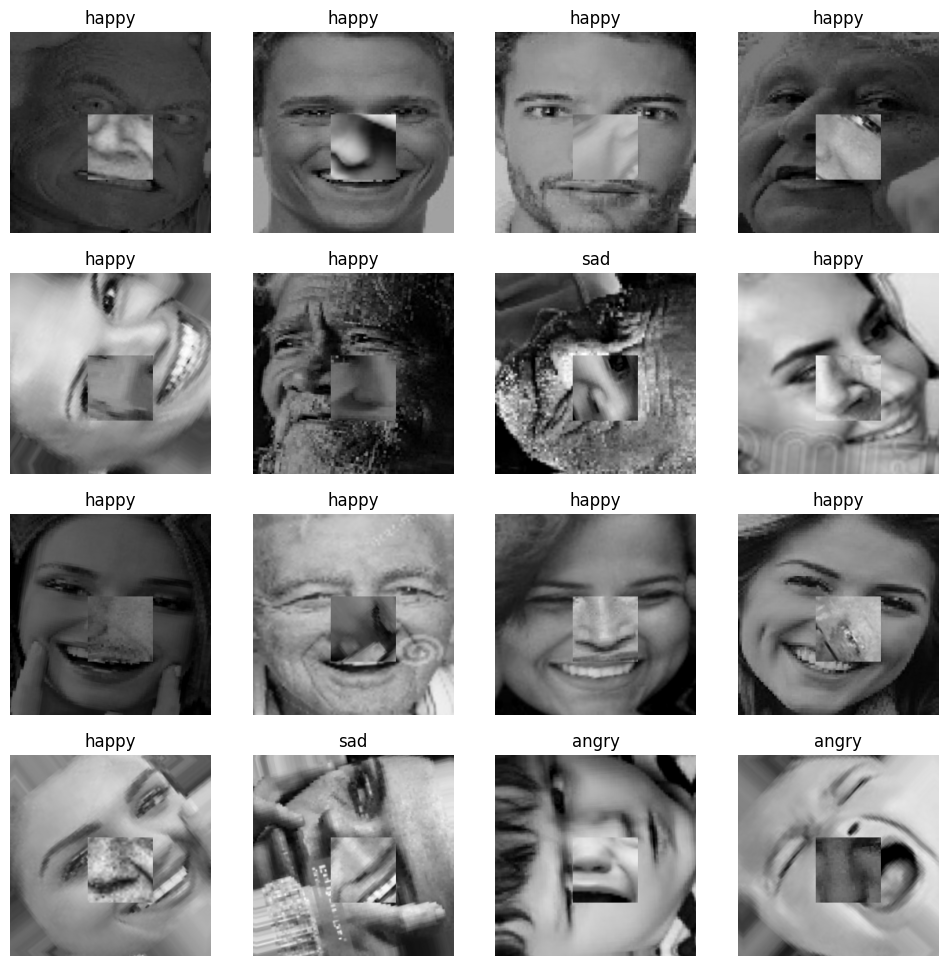

In [ ]:
plt.figure(figsize = (12, 12))
for images, labels in train_data_cutmix.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    plt.imshow(tf.clip_by_value(images[i], 0, 1))  # Ensures values stay in [0,1]
    plt.title(CLASS_NAMES[tf.argmax(labels[i], axis = 0).numpy()])
    plt.axis('off')

##  7. Modelling

In this section, we conduct experiments using different deep learning architectures to analyze their performance. We implement and compare the following models:

1.  **LeNet Model –** A classic CNN architecture designed for simple image classification tasks, serving as a baseline.
2.  **ResNet Model –** A deeper network with residual connections to enable efficient training and improved accuracy.
3.  **Transfer Learning –** Utilizing pre-trained models on large datasets to enhance performance with minimal training on our specific dataset.

These experiments help evaluate model effectiveness, convergence, and generalization. 🚀


### 7.1 Lenet Model


**LeNet** is one of the first convolutional neural networks (CNNs), designed by Yann LeCun in 1989 for handwritten digit recognition. It consists of:

1.    **Convolutional Layers (C1, C3) –** Extract spatial features using small 5×5 filters.
2.    **Pooling Layers (S2, S4) –** Downsample feature maps using average pooling to reduce spatial dimensions.
3.    **Fully Connected Layers (F5, Output) –** Flatten and classify features into categories.

LeNet is efficient for small datasets and serves as a foundation for modern CNN architectures.

In [ ]:
# Lets create Lenet Model
lenet_model = tf.keras.models.Sequential([
    InputLayer(shape = (CONFIGURATION['IM_SIZE'], CONFIGURATION['IM_SIZE'], 3)),
    resize_rescaling_layers,

    # 1st Conv2D Layer
    Conv2D(filters = CONFIGURATION['N_FILTERS'],
           kernel_size = CONFIGURATION['KERNEL_SIZE'],
           strides = CONFIGURATION['N_STRIDES'],
           kernel_regularizer = L2(CONFIGURATION['REGULARIZATION_RATE']),
           activation = 'relu'),

    BatchNormalization(),
    MaxPool2D(pool_size = CONFIGURATION['POOL_SIZE'],
              strides = CONFIGURATION['N_STRIDES'] * 2),
    Dropout(rate = CONFIGURATION['DROPOUT_RATE']),

    # 2nd Conv2D Layer
    Conv2D(filters = CONFIGURATION['N_FILTERS'] * 2 + 4,
           kernel_size = CONFIGURATION['KERNEL_SIZE'],
           strides = CONFIGURATION['N_STRIDES'],
           kernel_regularizer = L2(CONFIGURATION['REGULARIZATION_RATE']),
           activation = 'relu'),

    BatchNormalization(),
    MaxPool2D(pool_size = CONFIGURATION['POOL_SIZE'],
              strides = CONFIGURATION['N_STRIDES'] * 2),

    # Flatten Layer
    Flatten(),

    # 1st Dense Layer
    Dense(units = CONFIGURATION['N_DENSE_1'],
          activation = 'relu',
          kernel_regularizer = L2(CONFIGURATION['REGULARIZATION_RATE'])),

    BatchNormalization(),
    Dropout(rate = CONFIGURATION['DROPOUT_RATE']),

    # 2nd Dense Layer
    Dense(units = CONFIGURATION['N_DENSE_2'],
          activation = 'relu',
          kernel_regularizer = L2(CONFIGURATION['REGULARIZATION_RATE'])),

    BatchNormalization(),

    # Output Layer
    Dense(units = CONFIGURATION['NUM_CLASSES'],
          activation = 'softmax')
])

lenet_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 6)         │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 254, 254, 6)         │              24 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 127, 127, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 16)        │             880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 125, 125, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 61504)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1024)                │      62,981,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 63,118,451 (240.78 MB)

 Trainable params: 63,116,103 (240.77 MB)

 Non-trainable params: 2,348 (9.17 KB)

#### 7.1.1 Applying Data Augmentation

Setup loss and metrics for the training.
1. Loss: In this case we are using categorical crossentropy loss since we have set our output classes to be categorical which represents the classes as one hot vectors [0,0,0] - Angry, [0,0,1] = Sad, [0,1,0] = Happy

2. Metrics = We are defining categorical accuracy to check whether predicted category is close to actual category.
Moreover, we are setting up Top_k_accuracy to see whether the top k classes with higher probability are close to actual value or not.

In [ ]:
# Setup loss and metrics
loss = CategoricalCrossentropy()
metrics = [CategoricalAccuracy(name = 'Categorical_Accuracy'), TopKCategoricalAccuracy(k = 2, name = 'Top_k_Accuracy')]

# Compile the model
lenet_model.compile(optimizer = Adam(CONFIGURATION['LEARNING_RATE']),
                    loss = loss,
                    metrics = metrics)

In [ ]:
# Fit the model
lenet_model_history = lenet_model.fit(train_data_augment,
                                      validation_data = val_data_augment,
                                      epochs = CONFIGURATION['N_EPOCHS']
                                      )

Epoch 1/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 22s 76ms/step - Categorical_Accuracy: 0.5104 - Top_k_Accuracy: 0.7984 - loss: 1.1132 - val_Categorical_Accuracy: 0.4078 - val_Top_k_Accuracy: 0.7015 - val_loss: 1.0952
Epoch 2/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - Categorical_Accuracy: 0.7093 - Top_k_Accuracy: 0.9083 - loss: 0.6847 - val_Categorical_Accuracy: 0.4991 - val_Top_k_Accuracy: 0.7744 - val_loss: 1.2399
Epoch 3/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - Categorical_Accuracy: 0.8366 - Top_k_Accuracy: 0.9618 - loss: 0.4225 - val_Categorical_Accuracy: 0.3819 - val_Top_k_Accuracy: 0.5909 - val_loss: 4.1306
Epoch 4/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - Categorical_Accuracy: 0.8799 - Top_k_Accuracy: 0.9718 - loss: 0.3327 - val_Categorical_Accuracy: 0.5040 - val_Top_k_Accuracy: 0.7792 - val_loss: 1.3344
Epoch 5/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 23s 65ms/step - Categorical_Accuracy: 0.9073 - Top_k_Accuracy: 0.9833 - loss: 0.2656 - val_Categorical_Accuracy: 0.6809 - val_To

In [ ]:
# Evaluate the model
lenet_model.evaluate(val_data_augment)

In [ ]:
plot_loss_curves(lenet_model_history)

In [ ]:
# Save the model
# lenet_model.save('lenet_model.h5')

#### 7.1.2 Applying CutMix Augmentation

In [ ]:
# Lets create Lenet Model for cutmix data augmentation
lenet_model_cutmix = tf.keras.models.Sequential([
    InputLayer(shape = (CONFIGURATION['IM_SIZE'], CONFIGURATION['IM_SIZE'], 3)),
    resize_rescaling_layers,

    # 1st Conv2D Layer
    Conv2D(filters = CONFIGURATION['N_FILTERS'],
           kernel_size = CONFIGURATION['KERNEL_SIZE'],
           strides = CONFIGURATION['N_STRIDES'],
           kernel_regularizer = L2(CONFIGURATION['REGULARIZATION_RATE']),
           activation = 'relu'),

    BatchNormalization(),
    MaxPool2D(pool_size = CONFIGURATION['POOL_SIZE'],
              strides = CONFIGURATION['N_STRIDES'] * 2),
    Dropout(rate = CONFIGURATION['DROPOUT_RATE']),

    # 2nd Conv2D Layer
    Conv2D(filters = CONFIGURATION['N_FILTERS'] * 2 + 4,
           kernel_size = CONFIGURATION['KERNEL_SIZE'],
           strides = CONFIGURATION['N_STRIDES'],
           kernel_regularizer = L2(CONFIGURATION['REGULARIZATION_RATE']),
           activation = 'relu'),

    BatchNormalization(),
    MaxPool2D(pool_size = CONFIGURATION['POOL_SIZE'],
              strides = CONFIGURATION['N_STRIDES'] * 2),

    # Flatten Layer
    Flatten(),

    # 1st Dense Layer
    Dense(units = CONFIGURATION['N_DENSE_1'],
          activation = 'relu',
          kernel_regularizer = L2(CONFIGURATION['REGULARIZATION_RATE'])),

    BatchNormalization(),
    Dropout(rate = CONFIGURATION['DROPOUT_RATE']),

    # 2nd Dense Layer
    Dense(units = CONFIGURATION['N_DENSE_2'],
          activation = 'relu',
          kernel_regularizer = L2(CONFIGURATION['REGULARIZATION_RATE'])),

    BatchNormalization(),

    # Output Layer
    Dense(units = CONFIGURATION['NUM_CLASSES'],
          activation = 'softmax')
])

lenet_model_cutmix.summary()

#### 7.1.3 Compile and train the model

In [ ]:
# Compile the model
lenet_model_cutmix.compile(loss = tf.keras.losses.CategoricalCrossentropy,
                           optimizer = tf.keras.optimizers.Adam(CONFIGURATION['LEARNING_RATE']),
                           metrics = [CategoricalAccuracy(name = 'Categorical_Accuracy'), TopKCategoricalAccuracy(k = 2, name = 'Top_k_Accuracy')])
# Fit the model
lenet_model_history_cutmix = lenet_model_cutmix.fit(train_data_cutmix,
                                      validation_data = val_data_cutmix,
                                      epochs = CONFIGURATION['N_EPOCHS'],
                                      )

#### 7.1.4 Evaluate the model

##### 7.1.4.1 Evaluate the model's performance on the Validation dataset


In [ ]:
# Evaluate the model
lenet_model.evaluate(val_data_cutmix)

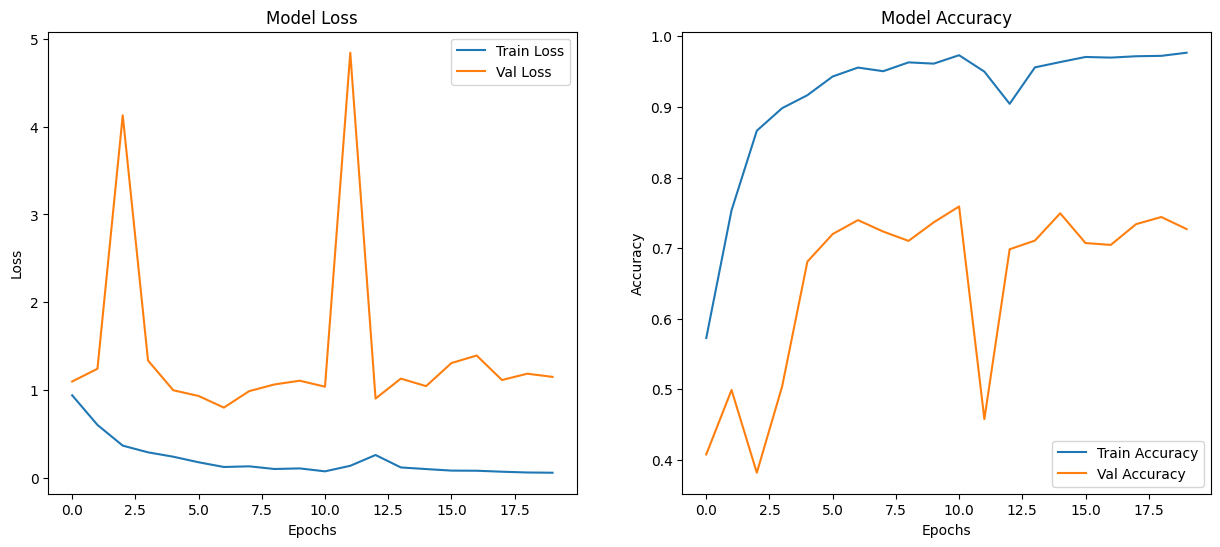

In [ ]:
plot_loss_curves(lenet_model_history_cutmix)

##### 7.1.4.2 Create the Confusion Matrix

In [ ]:
# Make predictions on validation dataset
predicted = []
labels = []

for im, label in val_data_augment:
  labels.append(label)
  predicted.append(lenet_model(im))

In [ ]:
print(len(labels), labels)

72 [<tf.Tensor: shape=(32, 3), dtype=float32, numpy=
array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)>, <tf.Tensor: shape=(32, 3), dtype=float32, numpy=
array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]

We will now process the true labels (labels) and predicted outputs (predicted) of a model to prepare them for evaluation.

1. `np.argmax(labels, axis=-1):`

* Converts the one-hot encoded true labels into their class indices along the last axis.

2. `flatten():`

* Flattens the arrays into 1D to simplify comparison.

3. `Concatenation:`

* Combines the processed labels and predictions from all batches (except the last and the last batch separately) into single 1D arrays:
* `lab:` Contains the true class indices.
* `preds:` Contains the predicted class indices.

The result is two 1D arrays (lab and preds) that are ready for metrics computation, such as accuracy, precision, or recall.

In [ ]:
# We will now process the true labels (labels) and predicted outputs (predicted)
lab = np.concatenate([np.argmax(labels[:-1], axis = -1).flatten(), np.argmax(labels[-1], axis = -1).flatten()])
preds = np.concatenate([np.argmax(predicted[:-1], axis = -1).flatten(), np.argmax(predicted[-1], axis = -1).flatten()])

print(np.argmax(labels[:-1], axis = -1).flatten())
print(np.argmax(predicted[:-1], axis = -1).flatten())

[1 1 0 ... 2 0 1]
[0 1 0 ... 2 2 1]


###### 7.1.4.2.1 Funtionize Make Predictions

In [ ]:
# Let's functionize making prediction
def make_predictions(model, dataset):
  """
    Generates predictions for a given dataset using the specified model.

    Args:
        model (tf.keras.Model or similar): The trained model used for making predictions.
        dataset (tf.data.Dataset or iterable): A dataset containing image-label pairs.

    Returns:
        tuple:
            - y_true (numpy.ndarray): Flattened array of true labels.
            - y_pred (numpy.ndarray): Flattened array of predicted labels.

    Note:
        Ensure the dataset provides labels in one-hot encoded format,
        as `np.argmax` is used to convert them into class indices.
    """

  labels = []
  predictions = []

  for image, label in dataset:
    labels.append(label)
    predictions.append(model(image))

  y_true = np.concatenate([np.argmax(labels[:-1], axis = -1).flatten(), np.argmax(labels[-1], axis = -1).flatten()])
  y_pred = np.concatenate([np.argmax(predictions[:-1], axis = -1).flatten(), np.argmax(predictions[-1], axis = -1).flatten()])

  return y_true, y_pred



In [ ]:
y_true, y_pred = make_predictions(model = lenet_model,
                                  dataset = val_data_augment)

In [ ]:
# Build the confusion matrix
cm = confusion_matrix(lab, preds)
print(cm)

plt.figure(figsize = (8, 8))
sns.heatmap(cm, annot= True,)
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

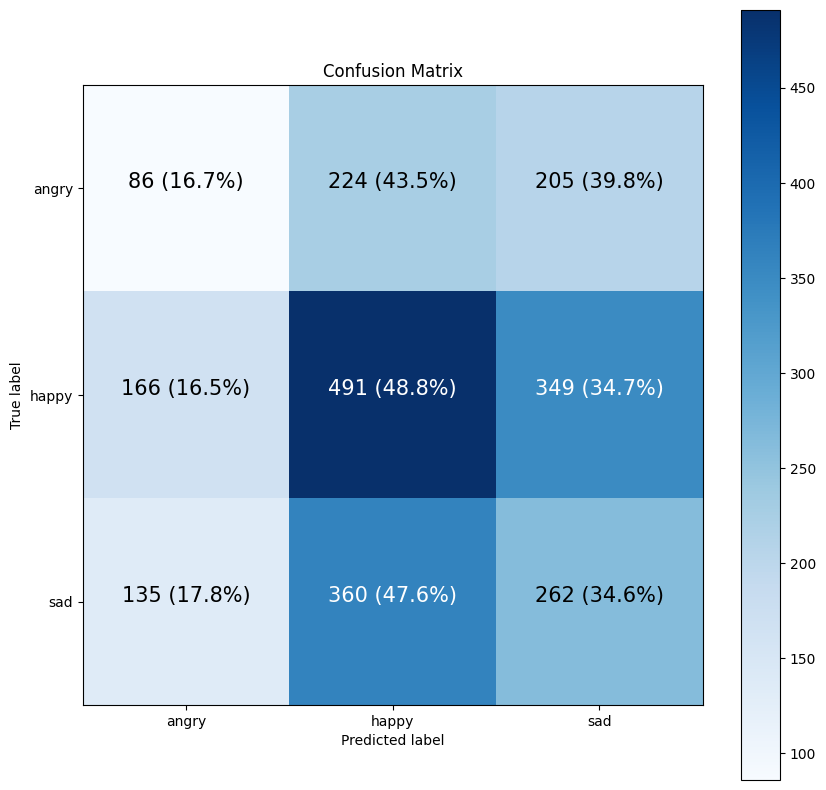

In [ ]:
make_confusion_matrix(y_true = y_true,
                      y_pred = y_pred,
                      classes = CLASS_NAMES)

###### 7.1.4.2.2 Calculate results and store them in a dictionary

In [ ]:
# let's create a helper function to compare different metrics across different models
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def calculate_results(y_true, y_preds):
  """
  Returns a dictionary of all the metrics needed to compare the model.

  Args:
    y_true:
      Ground truth labels or actual labels

    y_pred:
      Labels predicted by the model.
  """
  # Let's calculate the metrics
  accuracy = accuracy_score(y_true, y_preds)
  precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_preds, average = 'weighted')

  metrics = {
      "accuracy" : accuracy,
      'precision' : precision,
      'recall': recall,
      'f1_score' : fscore
  }

  return metrics

In [ ]:
# Save the model
# lenet_model.save('lenet_model.h5')

#### 7.1.5 Testing

Make predictions on a test image

Using the trained model, make predictions on the random images of unseen data.

##### 7.1.5.1 Prediction on a sample random image

In [ ]:
# Turn the sample image into a tensor
sample_image_tensor = tf.constant(sample_image, dtype = tf.float32)

# Check image dimemsions
print(f'Sample image tensor dimensions: {sample_image_tensor.shape}')

# Add an extra dimension for batch size to represent our image as (batch_size, im_size, im_size, channels)(1, 224, 224, 3)
sample_image_tensor_dim = tf.expand_dims(sample_image_tensor, axis = 0)

# Print the dimensions after adding an extra dim
print(f'\nImage dimensions after adding extra dimension (batch_size, im_size, im_size, channels) -> {sample_image_tensor_dim.shape}\n')

# Let's now try to make prediction on the image
pred_probs = lenet_model.predict(sample_image_tensor_dim)

# Turn the probabilities into class labels
print(f'Predicted Class Label: {CLASS_NAMES[tf.argmax(pred_probs[0], axis = 0).numpy()].upper()}')


Sample image tensor dimensions: (224, 224, 3)

Image dimensions after adding extra dimension (batch_size, im_size, im_size, channels) -> (1, 224, 224, 3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 991ms/step
Predicted Class Label: HAPPY


(-0.5, 223.5, 223.5, -0.5)

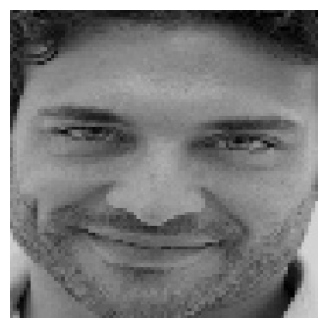

In [ ]:
# Load a sample image from the data
sample_image = cv2.imread('/content/Emotions Dataset/Emotions Dataset/test/happy/100610.jpg_brightness_1.jpg')

# Display the image
plt.figure(figsize = (4,4))
plt.imshow(sample_image)
plt.axis('off')

##### 7.1.5.2 Making predictions on multiple random images

Let's functionize the above code to make it work for picking random images from the given directory and plotting them against the truth labels.

**Explanation:**

`[dirnames for (dirnames, _, _) in os.walk(data_dir)][1:]`

* `os.walk(data_dir):`

- `os.walk()` generates tuples for each directory in the specified directory tree `(data_dir)`.

Each tuple has three elements:

- `dir`: The current directory path.
- `filepath`: A list of subdirectories in that directory (we're not using it here, hence _ ).
- `filename`: A list of files in that directory (also ignored here with _ ).


**List Comprehension:**

* `[dir for (dir, _, _) in os.walk(data_dir)]` creates a list of directory paths `(dir)` generated by `os.walk()`.

* Only the directory names are retained, and subdirectory and file lists are ignored.


Sample Output:

`['/content/Emotions Dataset/Emotions Dataset/train/happy',`

 `'/content/Emotions Dataset/Emotions Dataset/train/angry',`

 `'/content/Emotions Dataset/Emotions Dataset/train/sad']`

In [ ]:
# Create a function to make predictions on multiple images picked at random
def make_prediction_random_images(data_dir, model):

  """
  This function makes the predictions on randomly picked images from the given
  directory and plots them against the truth labels.

    Args:
      - data_dir : it takes the path of the data
      - model : the model for making predictions
  """

  # Extract paths from the data directory
  paths = [dirnames for (dirnames, _, _) in os.walk(data_dir)][1:]

  # Setup figure size
  plt.figure(figsize = (12, 6))

  for i in range(6):
    # Plot 6 random images and make prediction on it using the model
    plt.subplot(2, 3, i + 1)

    # Randomly select a path from paths
    random_path = random.choice(paths)

    # Choose an image randomly from the random path
    random_image = random.choice(os.listdir(random_path))
    random_image_path = random_path + '/' + random_image

    # Read image
    read_image = cv2.imread(random_image_path)

    # Resize image to expected size by the model
    read_image = cv2.resize(read_image, (CONFIGURATION['IM_SIZE'], CONFIGURATION['IM_SIZE'])) # Resizing to (256,256)

    # Turn the image into tensor
    image_tensor = tf.constant(read_image, dtype = tf.float32)

    # Fetch the actual label from the image
    actual_label = random_path.split('/')[-1]

    # Add an extra dimension to the image
    image_tensor_dim = tf.expand_dims(image_tensor, axis = 0)

    # Make prediction on the image
    pred_probs = model.predict(image_tensor_dim)

    # Fetch predicted class label
    pred_class_label = CLASS_NAMES[tf.argmax(pred_probs[0], axis = 0).numpy()]

    # Display the images
    plt.imshow(image_tensor/255.)
    plt.title(f'Actual Label : {actual_label}\nPredicted Label : {pred_class_label}\nPrediction Probabilty: {np.round(max(pred_probs[0]) * 100, 2)}%')

  plt.tight_layout()

  return None

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 778ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


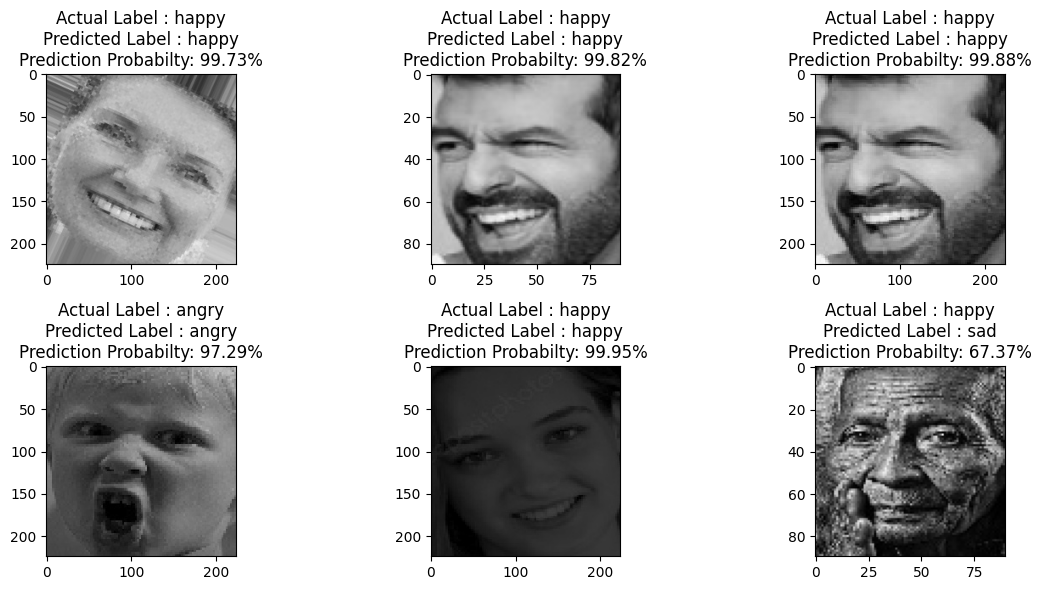

In [ ]:
make_prediction_random_images(val_dir, lenet_model)

### **7.2 ResNet Model**

**ResNets (Residual Networks)** are deep convolutional neural networks designed to address vanishing gradients in deep architectures. They use residual connections (skip connections) that allow gradients to flow through layers by bypassing some blocks, enabling training of very deep networks. ResNets are composed of residual blocks, where the identity function helps preserve information. This design improves convergence and generalization. Introduced in 2015, ResNet-50, ResNet-101, and ResNet-152 are common variants, widely used in image recognition, object detection, and segmentation tasks.

#### **ResNet Model Architecture**

![](https://github.com/krutika-shimpi/Human_Emotion_Detection_Project/raw/main/ResNetModelArchitecture.png)

\

#### **ResNet Model Block**



![ResnetModelBlock](https://github.com/krutika-shimpi/Human_Emotion_Detection_Project/raw/main/ResNetModelBlock.PNG)



Let us now create above `ResNet_34_Layer` architecture with model subclassing.
1. **Custom Conv2D Layer**

  * Create a wrapper around `Conv2D` with Batch Normalization and optional activation.
  * Helps standardize convolution operations across the network.

2. **Residual Block**

  * Consists of two Conv2D layers with Batch Normalization and ReLU activation.
  * Includes a skip connection that adds the input to the output, enabling gradient flow in deep networks.

3. **ResNet-34 Architecture**

  * Stack multiple residual blocks following the original ResNet-34 configuration.
  * Use an initial Conv2D layer, followed by residual blocks and fully connected layers for classification.

#### 7.2.1 Custom Conv2D Layer

##### **Description of `CustomConv2D` Class**

The `CustomConv2D` class is a custom implementation of a **Convolutional Layer** that integrates a **Batch Normalization layer** after a **2D Convolutional Layer**. This helps improve model training by normalizing activations and reducing internal covariate shift.


* The convolutional layer applies a **filter of given size and stride** to extract spatial features.
* The batch normalization layer normalizes the output, stabilizing training and accelerating convergence.
* **ReLU activation** is applied within the convolution operation for non-linearity.
* This class **inherits from** `Layer` and is designed to be reusable in deep networks like **ResNet**.

In [ ]:
# Define a custom convolutional layer with batch normalization
class CustomConv2D(Layer):  # Should inherit from 'Layer' not 'Layers'
  def __init__(self, n_filters, kernel_size, n_strides, padding = 'valid'):
    """
    Initializes the CustomConv2D layer.

    Args:
        n_filters (int): Number of filters (channels) in the convolution layer.
        kernel_size (int or tuple): Size of the convolutional kernel.
        n_strides (int): Stride of the convolution operation.
        padding (str): Padding type ('same' or 'valid').

    """
    # Call parent class constructor and assign a custom name
    super(CustomConv2D, self).__init__(name = 'custom_conv2d')

    # Define the convolutional layer with given parameters
    self.conv = Conv2D(filters = n_filters,
                       kernel_size = kernel_size,
                       strides = n_strides,
                       padding = padding,
                       activation = 'relu')  # ReLU activation function

    # Batch Normalization layer to stabilize training
    self.batch_norm = BatchNormalization()

  def call(self, x, training=True):
    """
    Defines the forward pass of the CustomConv2D layer.

    Args:
        x (tensor): Input tensor.
        training (bool): Flag to indicate whether it's training or inference mode.

    Returns:
        tensor: Processed tensor after applying convolution and batch normalization.
    """
    x = self.conv(x)       # Apply convolution operation
    x = self.batch_norm(x, training = training) # Normalize activations using batch normalization
    return x

#### 7.2.2 Residual Block

##### **Description of the `ResidualBlock` Class**

The `ResidualBlock` class implements a residual block, a key component of ResNet architectures, to enhance deep neural network training by allowing identity mappings through skip connections. This helps mitigate the vanishing gradient problem and improves convergence speed.

\

**Residual Block**

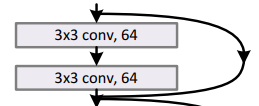

\
##### **Class Breakdown**
1. `Initialization (__init__ method)`

* **Inputs:**
  1. `n_channels:` Number of output channels for the convolutional layers.
  2. `n_strides:` Stride value for downsampling (default = 1).

* **Operations:**
* Defines two 3×3 convolutional layers (`custom_conv_1`, `custom_conv_2`) with the given number of channels.
* Uses ReLU activation to introduce non-linearity.
* If `n_strides ≠ 1`, it sets `self.dotted = True`, indicating that the input dimensions must be adjusted using a 1×1 convolution (`custom_conv_3`).

  **If Dotted**

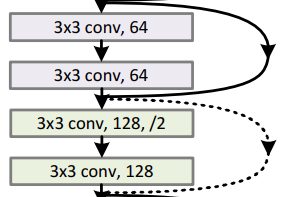

\
2. **Forward Pass (`call` method)**
* **Step 1:** Passes the input through `custom_conv_1` and `custom_conv_2`.
* **Step 2:**
  1. If `self.dotted` is `True` (stride > 1), applies 1×1 convolution (`custom_conv_3`) to downsample the input before addition.
  2. Otherwise, directly adds the input to maintain the same dimensions.
* **Step 3:** Applies element-wise addition to merge the residual connection.
* **Step 4:** Activates the result using ReLU to introduce non-linearity.


In [ ]:
class ResidualBlock(Layer):
  def __init__(self, n_channels, n_strides = 1):
    super(ResidualBlock, self).__init__(name = 'res_block')

    self.dotted = (n_strides != 1)

    self.custom_conv_1 = CustomConv2D(n_filters = n_channels,
                                      kernel_size = 3,
                                      n_strides = n_strides,
                                      padding = 'same')

    self.custom_conv_2 = CustomConv2D(n_filters = n_channels,
                                      kernel_size = 3,
                                      n_strides = 1,
                                      padding = 'same')

    self.activation = Activation('relu')

    if self.dotted:
      self.custom_conv_3 = CustomConv2D(n_filters = n_channels,
                                        kernel_size = 1,
                                        n_strides = n_strides)

  # Define the call method to perform forward pass
  def call(self, input, training):
    # Pass input through conv layers, removing the training keyword argument
    x = self.custom_conv_1(input, training = training)
    x = self.custom_conv_2(x, training = training)

    # If dotted is True, apply 1x1 convolution (custom_conv_3) to adjust input dimensions before addition.
    if self.dotted:
      x_add = self.custom_conv_3(input, training = training)
      x_add = Add()([x, x_add])

    else:
      x_add = Add()([x, input])

    return self.activation(x_add)

#### 7.2.3 ResNet34 Model

##### **Description of ResNet-34 Architecture**
The `ResNet34` class defines a **Residual Neural Network (ResNet-34)**, a deep convolutional model designed for efficient feature extraction and classification. It follows the **ResNet family** structure, which uses **residual blocks** to enable deeper networks while mitigating the vanishing gradient problem through **skip connections**.
bold text
##### **Key Architectural Components**
* **Initial Convolution & Pooling**

  1. A **7x7 convolutional layer** (stride=2) extracts **low-level spatial features.**
  2. A **3x3 max pooling layer** (stride=2) reduces spatial dimensions.

* **Residual Block Groups**

  1. First group (64 filters, 3 blocks): Identity shortcut, no downsampling.
  2. Second group (128 filters, 4 blocks): First block downsamples (stride=2).
  3. Third group (256 filters, 6 blocks): First block downsamples (stride=2).
  4. Fourth group (512 filters, 3 blocks): First block downsamples (stride=2).
  5. Each block consists of two 3x3 convolutional layers with ReLU activation.

* **Global Average Pooling**

  1. Converts the final feature map into a single **1D vector**, reducing parameters.

* **Fully Connected Layer**

  1. Maps the extracted features to CONFIGURATION["NUM_CLASSES"] using softmax activation for classification.
  2. Forward Pass (call Method)
  3. Passes input through convolution + pooling layers.
  4. Processes each residual block group sequentially.
  5. Applies global average pooling to flatten features.
  6. Uses a final fully connected layer for classification.

This architecture balances depth (34 layers) and efficiency, making it ideal for image classification tasks. 🚀

In [ ]:
# Define ResNet-34 model by subclassing tf.keras.Model
class ResNet34(Model):
  def __init__(self):
    # Initialize the base Model class and assign a name to this model
    super(ResNet34, self).__init__(name='resnet34')

    # Initial Convolution Layer: 7x7 kernel, stride 2, to extract low-level features
    self.conv_1 = CustomConv2D(n_filters = 64,
                               kernel_size = 7,
                               n_strides = 2,
                               padding = 'same')  # Ensure output size matches expected dimensions

    # Max Pooling Layer: 3x3 kernel, stride 2, to reduce spatial dimensions
    self.max_pool = MaxPooling2D(pool_size = 3,
                                 strides = 2)

    # First Residual Block Group (3 blocks, no downsampling)
    self.conv_2_1 = ResidualBlock(64)  # Uses identity shortcut
    self.conv_2_2 = ResidualBlock(64)
    self.conv_2_3 = ResidualBlock(64)

    # Second Residual Block Group (4 blocks, downsample at first block)
    self.conv_3_1 = ResidualBlock(128, 2)  # Downsampling occurs here (stride=2)
    self.conv_3_2 = ResidualBlock(128)
    self.conv_3_3 = ResidualBlock(128)
    self.conv_3_4 = ResidualBlock(128)

    # Third Residual Block Group (5 blocks, downsample at first block)
    self.conv_4_1 = ResidualBlock(256, 2)  # Downsampling occurs here
    self.conv_4_2 = ResidualBlock(256)
    self.conv_4_3 = ResidualBlock(256)
    self.conv_4_4 = ResidualBlock(256)
    self.conv_4_5 = ResidualBlock(256)
    self.conv_4_6 = ResidualBlock(256)

    # Fourth Residual Block Group (3 blocks, downsample at first block)
    self.conv_5_1 = ResidualBlock(512, 2)  # Downsampling occurs here
    self.conv_5_2 = ResidualBlock(512)
    self.conv_5_3 = ResidualBlock(512)

    # Global Average Pooling Layer: Reduces spatial dimensions to 1x1
    self.global_pool = GlobalAveragePooling2D()

    # Fully Connected Layer: Maps to the number of classes using softmax activation
    self.fc_3 = Dense(CONFIGURATION["NUM_CLASSES"], activation='softmax')

  # Define the forward pass for the model
  def call(self, x, training = True):
    x = self.conv_1(x)    # Initial convolution
    x = self.max_pool(x)  # Apply max pooling

    # Apply the first residual block group
    x = self.conv_2_1(x, training = training)
    x = self.conv_2_2(x, training = training)
    x = self.conv_2_3(x, training = training)

    # Apply the second residual block group
    x = self.conv_3_1(x, training = training)
    x = self.conv_3_2(x, training = training)
    x = self.conv_3_3(x, training = training)
    x = self.conv_3_4(x, training = training)

    # Apply the third residual block group
    x = self.conv_4_1(x, training = training)
    x = self.conv_4_2(x, training = training)
    x = self.conv_4_3(x, training = training)
    x = self.conv_4_4(x, training = training)
    x = self.conv_4_5(x, training = training)
    x = self.conv_4_6(x, training = training)

    # Apply the fourth residual block group
    x = self.conv_5_1(x, training = training)
    x = self.conv_5_2(x, training = training)
    x = self.conv_5_3(x, training = training)

    # Global average pooling reduces the feature map to a 1D vector
    x = self.global_pool(x)

    # Fully connected (dense) layer for final classification
    return self.fc_3(x)


# Instantiate the model and view its summary
resnet_34 = ResNet34()
resnet_34(tf.zeros([1, 256, 356, 3]))
resnet_34.summary()

Model: "resnet34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ custom_conv2d (CustomConv2D)         │ ?                           │           9,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (1, 63, 88, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block (ResidualBlock)            │ ?                           │          74,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block (ResidualBlock)            │ ?                           │          74,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block (ResidualBlock)            │ ?                           │          74,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block (ResidualBlock)            │ ?                           │         231,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block (ResidualBlock)            │ ?                           │         296,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block (ResidualBlock)            │ ?                           │         296,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block (ResidualBlock)            │ ?                           │         296,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block (ResidualBlock)            │ ?                           │         921,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block (ResidualBlock)            │ ?                           │       1,182,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block (ResidualBlock)            │ ?                           │       1,182,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block (ResidualBlock)            │ ?                           │       1,182,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block (ResidualBlock)            │ ?                           │       1,182,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block (ResidualBlock)            │ ?                           │       1,182,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block (ResidualBlock)            │ ?                           │       3,677,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block (ResidualBlock)            │ ?                           │       4,723,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block (ResidualBlock)            │ ?                           │       4,723,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (1, 512)                    │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (1, 3)                      │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,311,747 (81.30 MB)

 Trainable params: 21,294,723 (81.23 MB)

 Non-trainable params: 17,024 (66.50 KB)

#### 7.2.4 Training ResNets



In [ ]:
# Start by setting up a check point callback
checkpoint_callback = ModelCheckpoint(
  # filepath = 'weights.{epoch:02d}-{val_loss:.2f}.weights.h5',
  filepath ='best_weights.keras',
  monitor = 'val_accuracy',
  mode = 'max', # Store the weights with highest validation accuracy
  verbose = 1,
  save_best_only = True,
  # save_weights_only = True
)

In [ ]:
# Define loss function
resnet_loss_function = CategoricalCrossentropy()

# Define metrics
metrics = [CategoricalAccuracy(name = 'accuracy'), TopKCategoricalAccuracy(k=2, name = 'top_k_accuracy')]

# Compile the model
resnet_34.compile(loss = resnet_loss_function,
                  optimizer = Adam(learning_rate = CONFIGURATION['LEARNING_RATE']*10),
                  metrics = metrics)

# Fit the model
resnet_history = resnet_34.fit(train_data_augment,
                               validation_data = val_data_augment,
                               validation_steps = int(len(val_data_augment) * 0.10),
                               epochs = CONFIGURATION['N_EPOCHS'], # *3 = 60 epochs
                               callbacks = [checkpoint_callback])

Epoch 1/60
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.4139 - loss: 1.9369 - top_k_accuracy: 0.7204
Epoch 1: val_accuracy improved from -inf to 0.37946, saving model to best_weights.keras
213/213 ━━━━━━━━━━━━━━━━━━━━ 113s 319ms/step - accuracy: 0.4140 - loss: 1.9342 - top_k_accuracy: 0.7205 - val_accuracy: 0.3795 - val_loss: 8.4567 - val_top_k_accuracy: 0.6250
Epoch 2/60
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.4474 - loss: 1.1602 - top_k_accuracy: 0.7484
Epoch 2: val_accuracy improved from 0.37946 to 0.40179, saving model to best_weights.keras
213/213 ━━━━━━━━━━━━━━━━━━━━ 47s 219ms/step - accuracy: 0.4475 - loss: 1.1600 - top_k_accuracy: 0.7485 - val_accuracy: 0.4018 - val_loss: 1.1133 - val_top_k_accuracy: 0.7009
Epoch 3/60
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.4946 - loss: 1.0370 - top_k_accuracy: 0.7779
Epoch 3: val_accuracy did not improve from 0.40179
213/213 ━━━━━━━━━━━━━━━━━━━━ 45s 212ms/step - accuracy: 0.4946 - loss: 1.0369 - to

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


213/213 ━━━━━━━━━━━━━━━━━━━━ 85s 229ms/step - accuracy: 0.6844 - loss: 0.7061 - top_k_accuracy: 0.8958 - val_accuracy: 0.6053 - val_loss: 0.8283 - val_top_k_accuracy: 0.8421
Epoch 12/60
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.6941 - loss: 0.6892 - top_k_accuracy: 0.9009
Epoch 12: val_accuracy did not improve from 0.60526
213/213 ━━━━━━━━━━━━━━━━━━━━ 45s 213ms/step - accuracy: 0.6941 - loss: 0.6891 - top_k_accuracy: 0.9010 - val_accuracy: 0.5223 - val_loss: 1.3339 - val_top_k_accuracy: 0.7277
Epoch 13/60
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.7240 - loss: 0.6436 - top_k_accuracy: 0.9020
Epoch 13: val_accuracy improved from 0.60526 to 0.63839, saving model to best_weights.keras
213/213 ━━━━━━━━━━━━━━━━━━━━ 47s 219ms/step - accuracy: 0.7240 - loss: 0.6436 - top_k_accuracy: 0.9021 - val_accuracy: 0.6384 - val_loss: 0.8330 - val_top_k_accuracy: 0.8571
Epoch 14/60
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.7429 - loss: 0.6024 - top_k_accuracy:

In [ ]:
import json
# Store history in a json file
with open('history.json', 'w') as f:
    json.dump(resnet_history.history, f)

with open('history.json', 'r') as f:
    loaded_history = json.load(f)

#### 7.2.5 Evaluate ResNet model

In [ ]:
# Let's evaluate our model on validation dataset
resnet_34.evaluate(val_dataset)

72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.7616 - loss: 1.0073 - top_k_accuracy: 0.9303


[1.0037891864776611, 0.769534707069397, 0.9293239712715149]

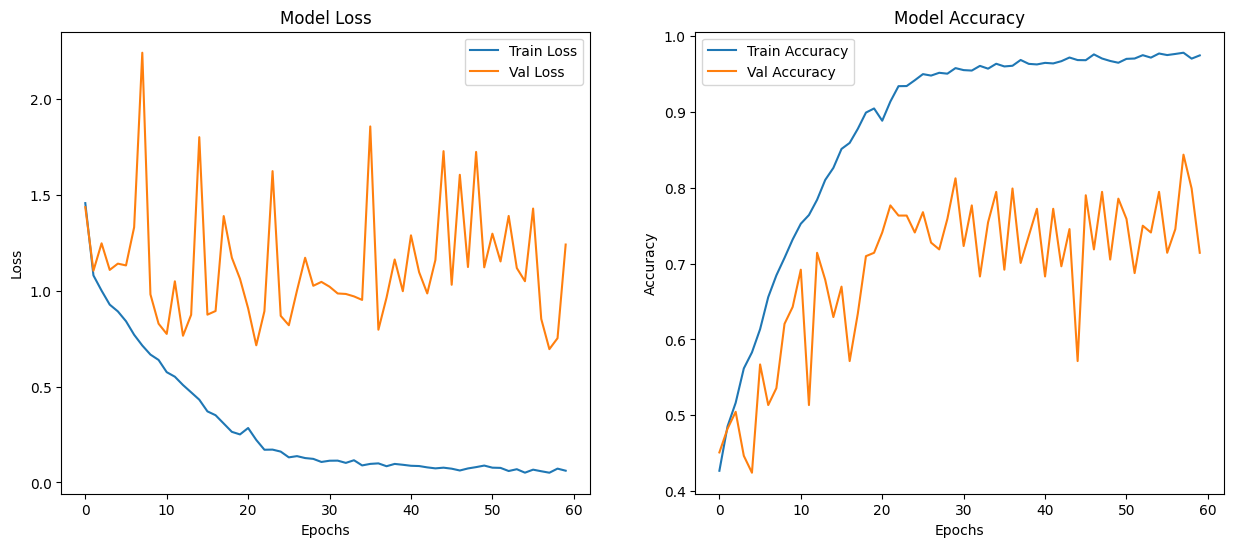

In [ ]:
# Plot the curves for ResNet Model
plot_loss_curves(resnet_history)

#### 7.2.6 Make predictions

#### 7.2.7 Save the model

In [ ]:
# Save the model
resnet_34.save('/content/drive/MyDrive/HumanEmotionDetection/resnet_34.h5')

### 7.3 Transfer Learning

**Transfer Learning** is a deep learning technique where a model trained on a large dataset is adapted for a different but related task. Instead of training a model from scratch, it leverages pre-trained weights, significantly reducing training time and data requirements.

**Approaches:**

1. **Feature Extraction –** Uses the pre-trained model as a fixed feature extractor, where only the final classification layer is trained.
2. **Fine-Tuning –** Unfreezes some deeper layers of the pre-trained model to adapt them to the new task while keeping early layers frozen.

Commonly used models include EfficientNet, ResNet, and VGG, pre-trained on ImageNet. 🚀

#### 7.3.1 Feature Extraction

In this section, we will explore feature extraction, a transfer learning technique where we leverage a pretrained model’s learned representations to extract meaningful features from new data. Instead of training the entire model, we use its lower layers as a fixed feature extractor while training only the final classification layers. This approach reduces computational cost, speeds up training, and improves performance, especially when working with limited data. We will discuss implementation strategies, layer selection, and practical use cases.

In [ ]:
# Load the EfficientNetB4 model as a feature extractor
feature_extraction_layer = tf.keras.applications.EfficientNetB4(
    include_top=False,  # Exclude the fully connected (classification) layers
    weights='imagenet',  # Use pre-trained weights from ImageNet
    input_tensor=None,  # No custom input tensor provided
    input_shape=(CONFIGURATION['IM_SIZE'], CONFIGURATION['IM_SIZE'], 3),  # Define input image shape
)

# Freeze the feature extraction layers to retain pre-trained weights
feature_extraction_layer.trainable = False  # Prevents updating weights during training

# Build the model using the feature extractor layer
feature_extract_model = tf.keras.Sequential([
    Input(shape=(CONFIGURATION['IM_SIZE'], CONFIGURATION['IM_SIZE'], 3)),  # Define input shape
    feature_extraction_layer,  # Use EfficientNetB4 as a backbone feature extractor
    GlobalAveragePooling2D(),  # Reduce spatial dimensions to a feature vector
    Dense(CONFIGURATION['N_DENSE_1'], activation='relu'),  # First fully connected (dense) layer
    BatchNormalization(),  # Normalize activations to stabilize training
    Dense(CONFIGURATION['N_DENSE_2'], activation='relu'),  # Second dense layer for deeper learning
    Dense(CONFIGURATION['NUM_CLASSES'], activation='softmax')  # Output layer with softmax activation for classification
])

# Display model architecture
feature_extract_model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb4 (Functional)          │ (None, 8, 8, 1792)          │      17,673,823 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1792)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1024)                │       1,836,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,645,538 (74.94 MB)

 Trainable params: 1,969,667 (7.51 MB)

 Non-trainable params: 17,675,871 (67.43 MB)

##### 7.3.1.1 Training Feature Extraction model

In [ ]:
# Define loss function
loss_function = CategoricalCrossentropy()

# Define metrics
metrics = [CategoricalAccuracy(name = 'accuracy'), TopKCategoricalAccuracy(k=2, name = 'top_k_accuracy')]

# Compile the model
feature_extract_model.compile(loss = loss_function,
                              optimizer = Adam(learning_rate = CONFIGURATION['LEARNING_RATE']*10),
                              metrics = metrics)

# Fit the model
feature_extraction_history = feature_extract_model.fit(
    train_data,
    validation_data = val_data,
    validation_steps = int(len(val_data) * 0.10),
    epochs = CONFIGURATION['N_EPOCHS'],
    callbacks = [checkpoint_callback])

NameError: name 'checkpoint_callback' is not defined

##### 7.3.1.2 Evaluate the model

In [ ]:
feature_extract_model.evaluate(val_dataset)

72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - accuracy: 0.7736 - loss: 0.9390 - top_k_accuracy: 0.9304


[0.8005497455596924, 0.7923617362976074, 0.9341527819633484]

In [ ]:
import json
# Store history in a json file
with open('feature_extraction_history.json', 'w') as f:
    json.dump(feature_extraction_history.history, f)

# with open('feature_extraction_history.json', 'r') as f:
#     loaded_history = json.load(f)

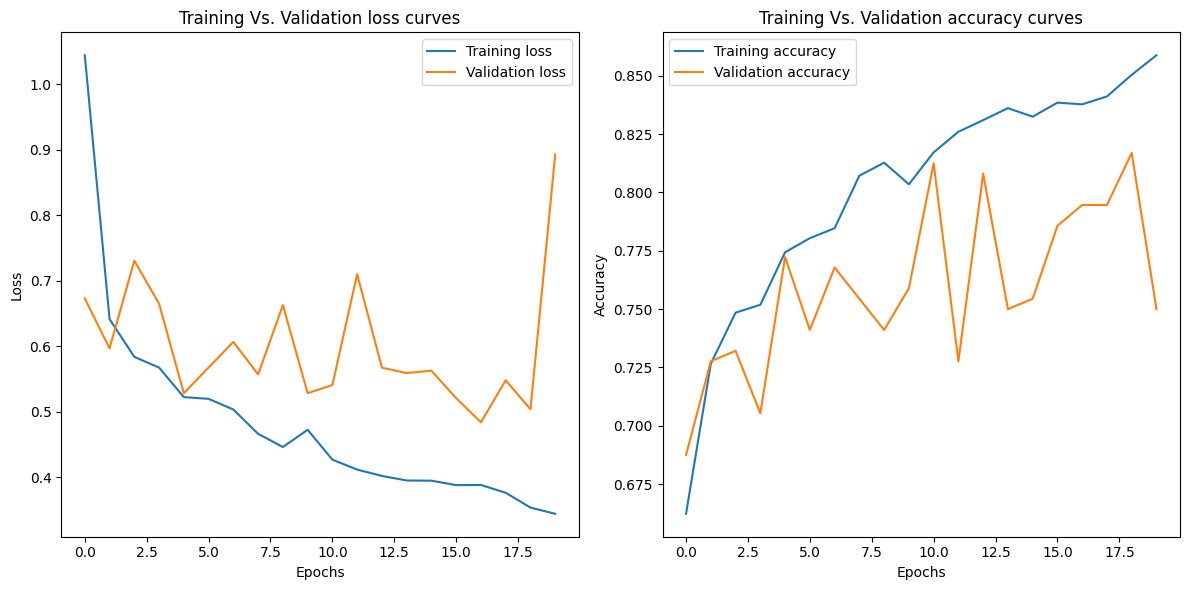

In [ ]:
# Plot loss curves
plot_loss_curves(history = feature_extraction_history, classification = True, val_data = True)

In [ ]:
feature_extraction_model = tf.keras.models.load_model('/content/drive/MyDrive/HumanEmotionDetection/feature_extraction_model.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### 7.3.1.3 Testing

In [ ]:
y_true, y_pred = make_predictions(model = feature_extract_model,
                                  dataset = val_dataset)

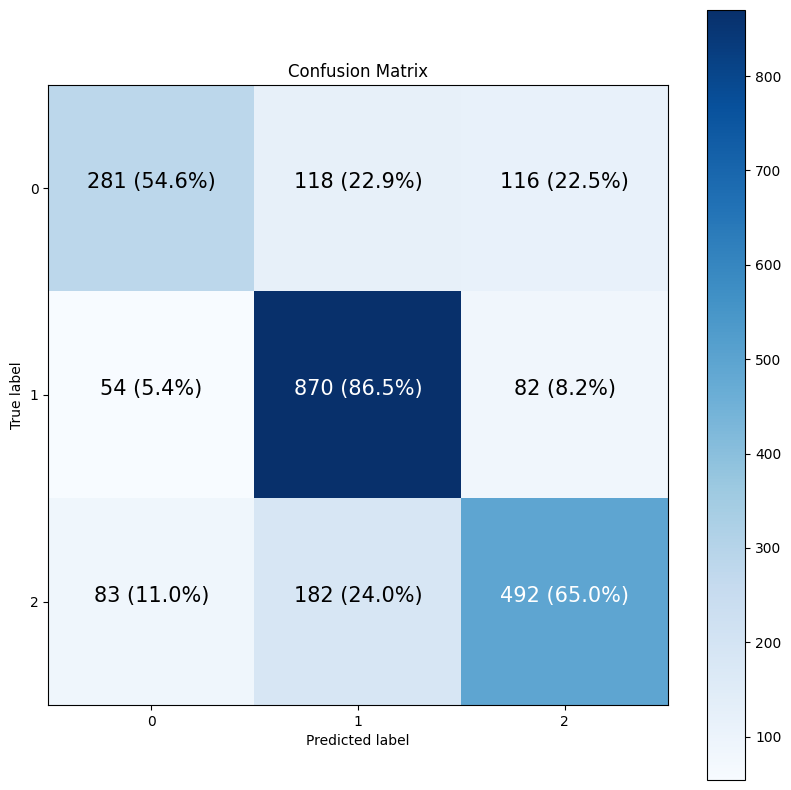

In [ ]:
make_confusion_matrix(y_true = y_true,
                      y_pred = y_pred)

In [ ]:
pretrained_model_results = calculate_results(y_true = y_true,
                                             y_preds = y_pred)
pretrained_model_results

{'accuracy': 0.7212467076382791,
 'precision': 0.7173105044188114,
 'recall': 0.7212467076382791,
 'f1_score': 0.715287724049591}

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


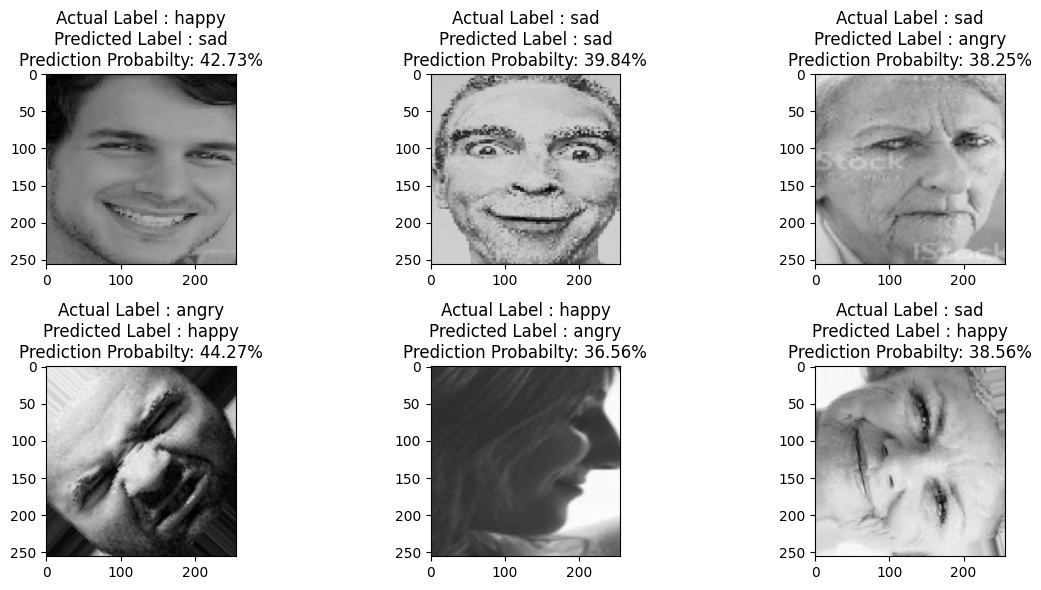

In [ ]:
make_prediction_random_images(data_dir = val_dir,
                              model = feature_extract_model)

#### 7.3.2 Fine Tuning pretrained model

In this section, we will explore the process of fine-tuning a pretrained model to improve its performance on a specific task. Fine-tuning involves taking a model that has been previously trained on a large dataset and adapting it to a new dataset by updating some or all of its layers. We will discuss best practices, techniques such as unfreezing layers, adjusting learning rates, and leveraging transfer learning to optimize model accuracy while preventing overfitting.

##### 7.3.2.1  Difference Between model.trainable and model(training) in Fine-Tuning

In fine-tuning, both statements control how the pretrained model updates during training, but they serve different purposes:

1. `base_model.trainable = True`

* This makes all layers of the `base_model` trainable, meaning their weights will be updated during backpropagation.
* Used when fine-tuning deeper layers of the model after initial feature extraction.

2. `base_model(input, training=False)`

* This runs the model in inference mode, ensuring layers like Batch Normalization and Dropout behave as they do during evaluation (fixed statistics, no randomness).
* Helps stabilize training when combining pretrained and new layers.

Together, they allow selective fine-tuning while maintaining stable feature representations.

In [ ]:
# Load the EfficientNetB4 model as the base model
base_model = tf.keras.applications.EfficientNetB4(
    include_top=False,  # Exclude the fully connected (classification) layers
    weights='imagenet',  # Use pre-trained weights from ImageNet
    input_tensor=None,  # No custom input tensor provided
    input_shape=(CONFIGURATION['IM_SIZE'], CONFIGURATION['IM_SIZE'], 3),  # Define input image shape
)

# Freeze the layers
base_model.trainable = False  # Prevents updating weights during training

# Let's Perform fine tuning by unfreezing the last 10 layers
for layer in base_model.layers[-10:]:
  layer.trainable = True

# Build the model using the functional api
input = Input(shape = (CONFIGURATION['IM_SIZE'], CONFIGURATION['IM_SIZE'], 3))
x = base_model(input, training = False) # To ensure we are in inference mode
x = GlobalAveragePooling2D()(x)
x = Dense(CONFIGURATION['N_DENSE_1'], activation = 'relu')(x)
x = BatchNormalization()(x)
x = Dense(CONFIGURATION['N_DENSE_2'], activation = 'relu')(x)
output = Dense(CONFIGURATION['NUM_CLASSES'], activation = 'softmax')(x)

fine_tuned_model = Model(input, output, name = 'fine_tuned_model')
fine_tuned_model.summary()

71686520/71686520 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "fine_tuned_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb4 (Functional)          │ (None, 8, 8, 1792)          │      17,673,823 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1792)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1024)                │       1,836,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,645,538 (74.94 MB)

 Trainable params: 4,586,099 (17.49 MB)

 Non-trainable params: 15,059,439 (57.45 MB)

In [ ]:
for layers in base_model.layers:
  print(layers.name, layers.trainable)

input_layer_2 False
rescaling_1 False
normalization False
rescaling_2 False
stem_conv_pad False
stem_conv False
stem_bn False
stem_activation False
block1a_dwconv False
block1a_bn False
block1a_activation False
block1a_se_squeeze False
block1a_se_reshape False
block1a_se_reduce False
block1a_se_expand False
block1a_se_excite False
block1a_project_conv False
block1a_project_bn False
block1b_dwconv False
block1b_bn False
block1b_activation False
block1b_se_squeeze False
block1b_se_reshape False
block1b_se_reduce False
block1b_se_expand False
block1b_se_excite False
block1b_project_conv False
block1b_project_bn False
block1b_drop False
block1b_add False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_dwconv_pad False
block2a_dwconv False
block2a_bn False
block2a_activation False
block2a_se_squeeze False
block2a_se_reshape False
block2a_se_reduce False
block2a_se_expand False
block2a_se_excite False
block2a_project_conv False
block2a_project_bn Fal

In [ ]:
# Define loss function
loss_function = CategoricalCrossentropy()

# Define metrics
metrics = [CategoricalAccuracy(name = 'accuracy'), TopKCategoricalAccuracy(k=2, name = 'top_k_accuracy')]

# Compile the model
fine_tuned_model.compile(loss = loss_function,
                         optimizer = Adam(learning_rate = CONFIGURATION['LEARNING_RATE']/100),
                         metrics = metrics)

# Fit the model
fine_tuned_model_history = fine_tuned_model.fit(
    train_dataset,
    validation_data = val_dataset,
    validation_steps = int(len(val_data) * 0.10),
    epochs = CONFIGURATION['N_EPOCHS'],
    verbose = 1,
    # callbacks = [checkpoint_callback]
    )

Epoch 1/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 109s 278ms/step - accuracy: 0.4993 - loss: 1.1394 - top_k_accuracy: 0.7782 - val_accuracy: 0.6473 - val_loss: 0.8361 - val_top_k_accuracy: 0.8929
Epoch 2/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 36s 169ms/step - accuracy: 0.6714 - loss: 0.7695 - top_k_accuracy: 0.8962 - val_accuracy: 0.6920 - val_loss: 0.7058 - val_top_k_accuracy: 0.9152
Epoch 3/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 26s 124ms/step - accuracy: 0.7287 - loss: 0.6557 - top_k_accuracy: 0.9234 - val_accuracy: 0.6964 - val_loss: 0.6928 - val_top_k_accuracy: 0.9018
Epoch 4/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 41s 193ms/step - accuracy: 0.7606 - loss: 0.5945 - top_k_accuracy: 0.9320 - val_accuracy: 0.7143 - val_loss: 0.6559 - val_top_k_accuracy: 0.9152
Epoch 5/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 26s 122ms/step - accuracy: 0.7933 - loss: 0.5219 - top_k_accuracy: 0.9481 - val_accuracy: 0.7634 - val_loss: 0.5594 - val_top_k_accuracy: 0.9464
Epoch 6/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 82s 315ms/step - accuracy: 0.7965 

In [ ]:
# Evaluate the fine-tuned model
results = fine_tuned_model.evaluate(val_dataset)

# Print the categorical accuracy, top-k accuracy, and loss
print(f"Loss: {results[0]:.4f}, Accuracy: {results[1]:.4f}, Top-K Accuracy: {results[2]:.4f}")

72/72 ━━━━━━━━━━━━━━━━━━━━ 15s 205ms/step - accuracy: 0.8316 - loss: 0.4516 - top_k_accuracy: 0.9433
Loss: 0.4423, Accuracy: 0.8349, Top-K Accuracy: 0.9451


In [ ]:
import json
with open('fine_tuned_history.json', 'w') as f:
    json.dump(fine_tuned_model_history.history, f)

In [ ]:
#fine_tuned_model.save('/content/drive/MyDrive/UDEMY/HumanEmotionDetection/fine_tuned_model.h5')

In [ ]:
fine_tuned_model = tf.keras.models.load_model('/content/drive/MyDrive/UDEMY/HumanEmotionDetection/fine_tuned_model.h5')

## 8. Visualizing intermediate layers

Visualizing intermediate layers is a powerful technique to understand **what a neural network is learning** at different stages of its architecture. By examining the outputs (feature maps) of intermediate layers, you can gain insights into how the network processes and transforms input data (e.g., images) to make predictions.

### **Why Visualize Intermediate Layers?**
1. **Interpretability:**

  * Understand what features the network is focusing on at different depths.

2. **Debugging:**

  * Identify issues like dead neurons, overfitting, or underfitting.

3. **Insights:**

  * See how the network builds hierarchical representations of the input data.

4. **Education:**

  * Learn how neural networks extract and combine features.

### What Are Intermediate Layers?

* In a Convolutional Neural Network (CNN), intermediate layers are the hidden layers between the input and output layers.

* These layers include:

  * Convolutional Layers: Extract features like edges, textures, and shapes.

  * Activation Layers: Introduce non-linearity (e.g., ReLU).

  * Pooling Layers: Reduce spatial dimensions (e.g., max pooling).

  * Fully Connected Layers: Combine features for final predictions.


### How to Visualize Intermediate Layers

**Step 1: Choose a Model**
  * Use a pre-trained model (e.g., VGG16, ResNet) or your own trained model.

**Step 2: Extract Intermediate Layer Outputs**
  * Create a new model that outputs the activations of the desired intermediate layers.

**Step 3: Pass an Input Through the Model**
  * Provide an input (e.g., an image) and get the feature maps from the intermediate layers.

**Step 4: Visualize the Feature Maps**
  * Plot the feature maps to see what the network is learning.



In [ ]:
# We will use pretrained VGG16 model
vgg16_base_model = tf.keras.applications.vgg16.VGG16(
    include_top = False,
    weights = 'imagenet',
    input_shape = (CONFIGURATION['IM_SIZE'], CONFIGURATION['IM_SIZE'], 3)
    )

vgg16_base_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Check if the layer is conv layer or not
def is_conv(layer_name):
  if 'conv' in layer_name:
    return True
  else:
    return False

#### **8.1 What Are Feature Maps?**
Feature maps are the outputs of convolutional layers in a Convolutional Neural Network (CNN). They represent the learned features (patterns) extracted from the input data (e.g., an image) at different levels of abstraction. Each feature map is a 2D grid of numerical values that corresponds to a specific filter (kernel) applied to the input.

##### **How Are Feature Maps Created?**
1. **Convolution Operation:**

  *     A filter (kernel) slides over the input image (or previous feature map) and performs element-wise multiplication and summation.

  * This process highlights specific patterns in the input, such as edges, textures, or shapes.

2. **Activation Function:**

  * After convolution, an activation function (e.g., ReLU) is applied to introduce non-linearity, making the network capable of learning complex patterns.

3. **Result:**

  * The output of this process is a feature map, which encodes where and how strongly a particular feature (e.g., an edge) is present in the input.


In [ ]:
# Extract the output of convolutional layers from the VGG16 base model
feature_maps = [layer.output for layer in vgg16_base_model.layers[1:] if is_conv(layer.name)]

# Create a new model that takes the same input as VGG16 but outputs feature maps
feature_map_model = Model(
    inputs=vgg16_base_model.input,  # Input remains the same as VGG16
    outputs=feature_maps  # Output consists of selected feature maps
)

# Print the summary of the new feature extraction model
feature_map_model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
len(feature_maps)

13

### 8.3 Make predictions and return feature maps

In [ ]:
# Create a function to make predictions on multiple images picked at random
def make_prediction_feature_maps(data_dir, model):

  """
  This function makes the predictions on randomly picked images from the given
  directory and returns the feature map

    Args:
      - data_dir : it takes the path of the data
      - model : the model for making predictions
  """

  # Extract paths from the data directory
  paths = [dirnames for (dirnames, _, _) in os.walk(data_dir)][1:]

  # Randomly select a path from paths
  random_path = random.choice(paths)

  # Choose an image randomly from the random path
  random_image = random.choice(os.listdir(random_path))
  random_image_path = random_path + '/' + random_image

  # Read image
  read_image = cv2.imread(random_image_path)

  # Resize image to expected size by the model
  read_image = cv2.resize(read_image, (CONFIGURATION['IM_SIZE'], CONFIGURATION['IM_SIZE'])) # Resizing to (256,256)

  # Turn the image into tensor
  image_tensor = tf.constant(read_image, dtype = tf.float32)

  # Fetch the actual label from the image
  actual_label = random_path.split('/')[-1]

  # Add an extra dimension to the image
  image_tensor_dim = tf.expand_dims(image_tensor, axis = 0)

  # Make prediction on the image
  f_maps = model.predict(image_tensor_dim)

  return f_maps

In [ ]:
f_maps = make_prediction_feature_maps(data_dir = val_dir,
                                      model = feature_map_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [ ]:
for i in range(len(f_maps)):
  print(f_maps[i].shape)

(1, 256, 256, 64)
(1, 256, 256, 64)
(1, 128, 128, 128)
(1, 128, 128, 128)
(1, 64, 64, 256)
(1, 64, 64, 256)
(1, 64, 64, 256)
(1, 32, 32, 512)
(1, 32, 32, 512)
(1, 32, 32, 512)
(1, 16, 16, 512)
(1, 16, 16, 512)
(1, 16, 16, 512)


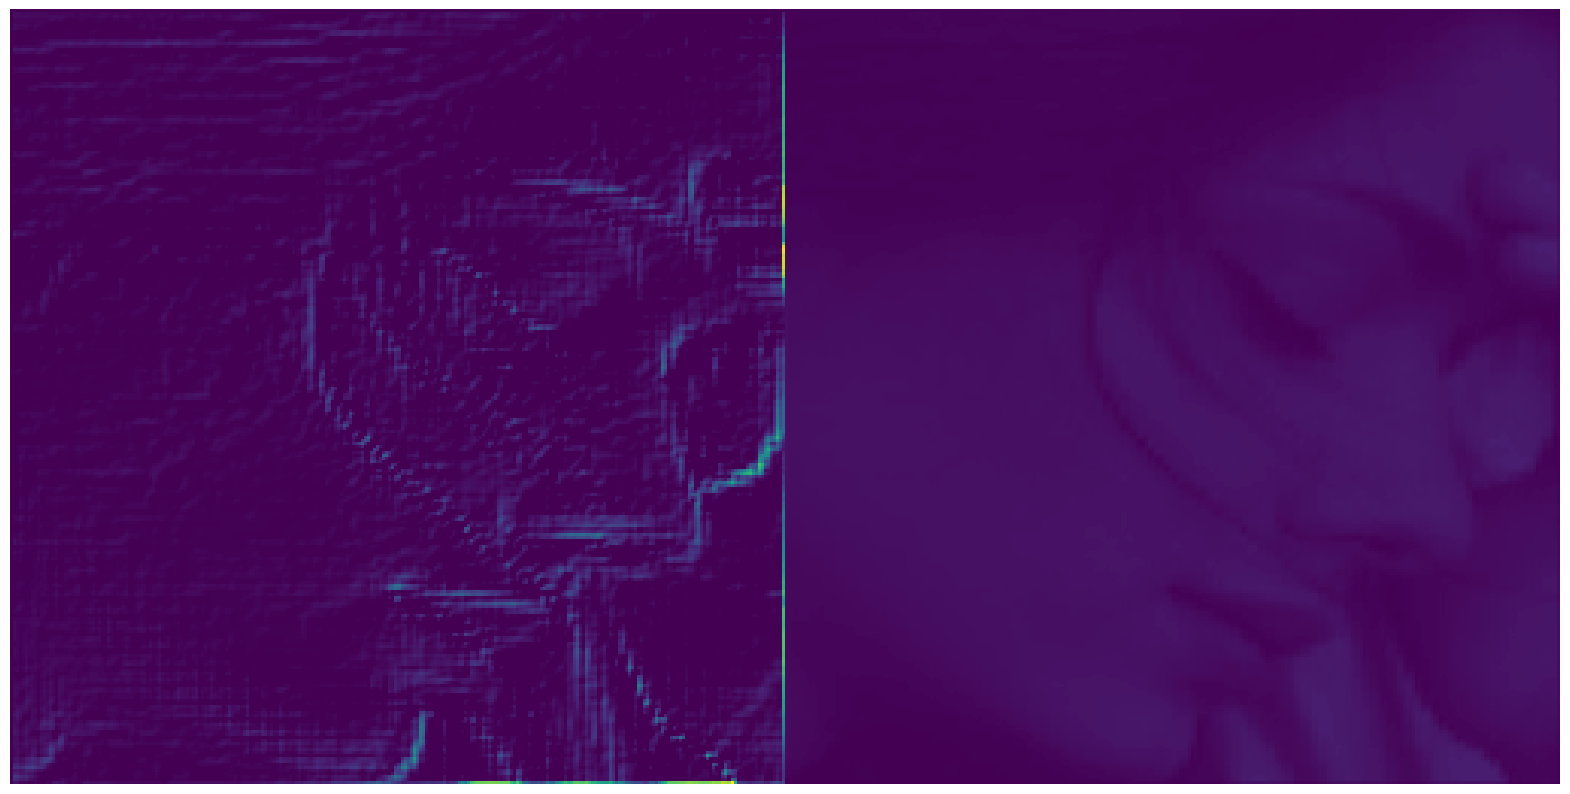

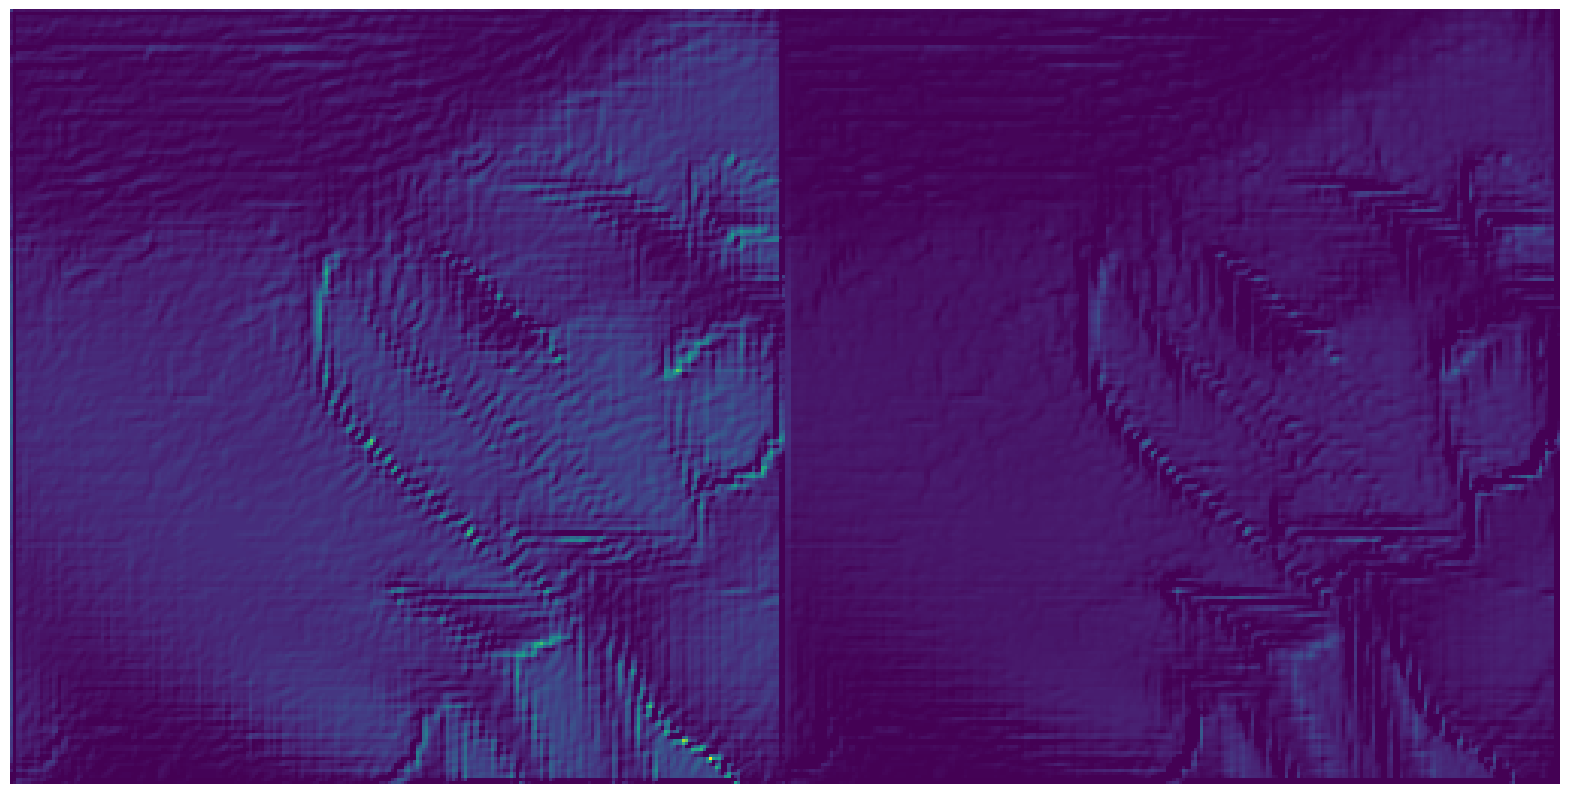

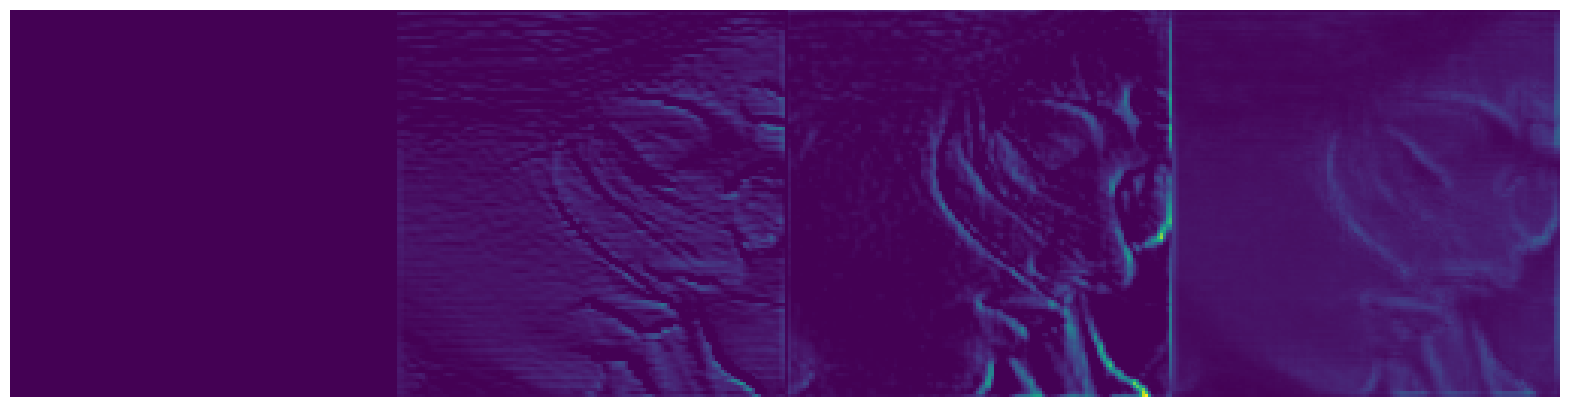

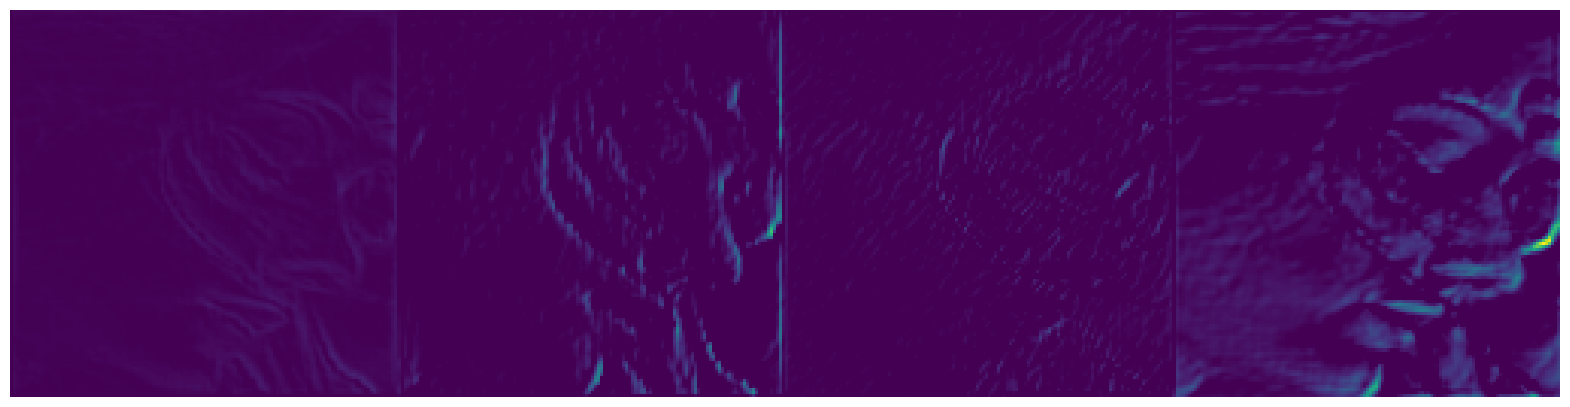

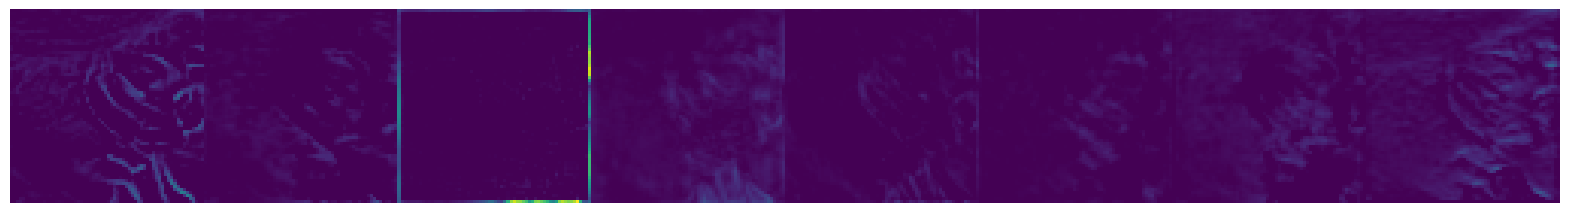

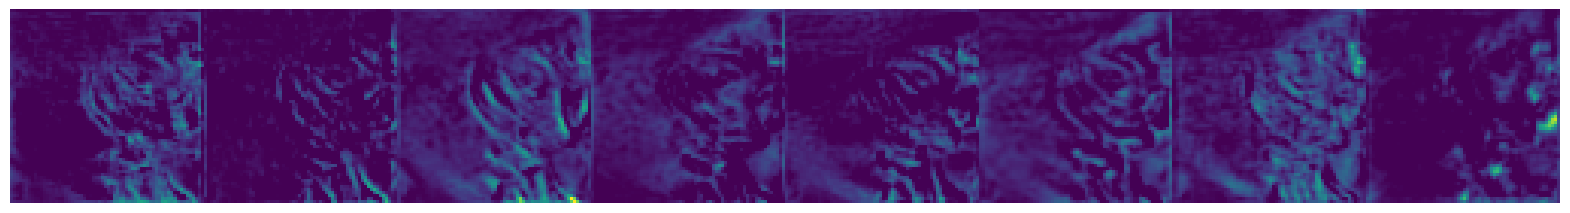

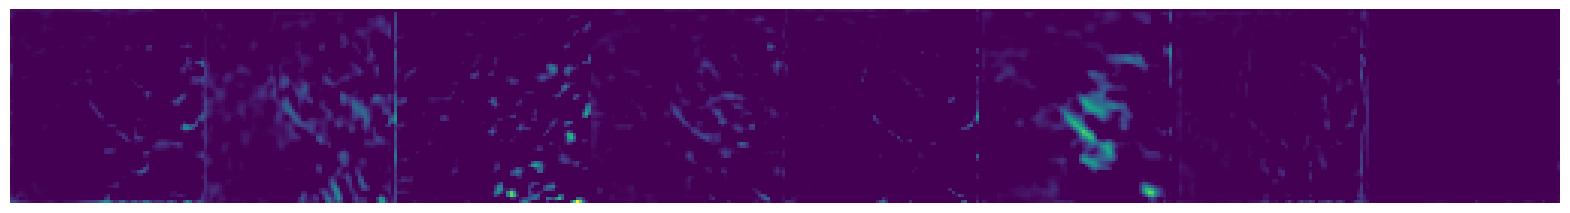

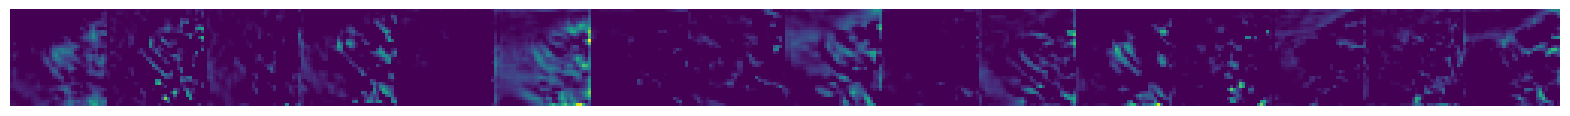

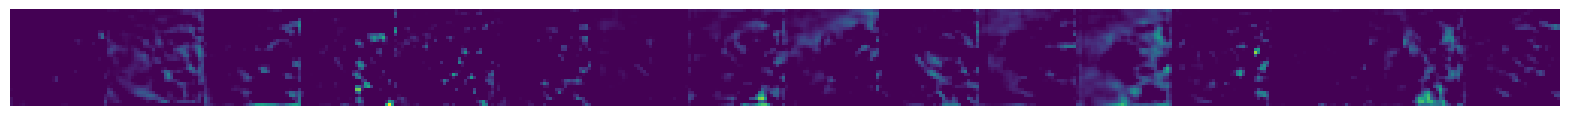

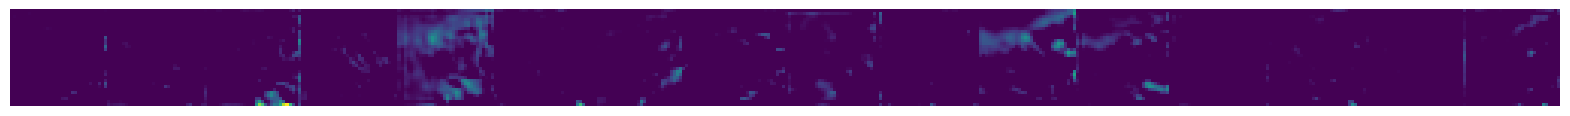

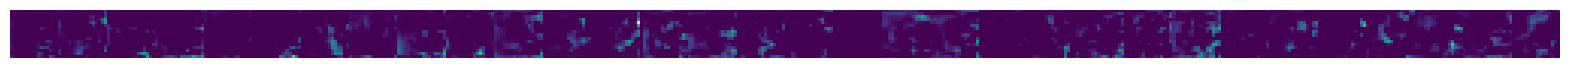

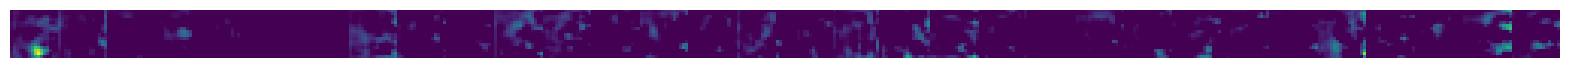

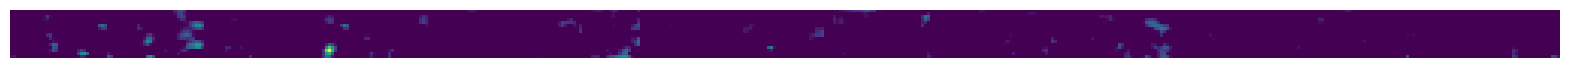

In [ ]:
# Loop through each feature map in the list f_maps
for i in range(len(f_maps)):
    # Create a new figure with a specified size
    plt.figure(figsize=(20, 20))

    # Get the spatial size of the feature map (assuming square shape)
    f_size = f_maps[i].shape[1]

    # Get the number of channels in the feature map
    n_channels = f_maps[i].shape[3]

    # Initialize a blank joint map to concatenate all channel activations
    joint_maps = np.ones((f_size, f_size * n_channels))

    # Iterate through each channel and place it in the joint map
    for j in range(n_channels):
        joint_maps[:, f_size * j: f_size * (j+1)] = f_maps[i][..., j]

    # Display the concatenated feature maps (truncated to 512 columns if needed)
    plt.imshow(joint_maps[:, :min(512, joint_maps.shape[1])])
    # Optionally, a grayscale colormap can be used by uncommenting cmap="gray"

    plt.axis("off")  # Hide axis labels for better visualization
    plt.show()  # Display the image
    plt.close()  # Close the figure to free up memory

## 9. GradCam technique

**Grad-CAM** (Gradient-weighted Class Activation Mapping)
Grad-CAM is a visualization technique used to interpret deep learning models, especially CNNs, by highlighting important regions in an image that influence a model's decision.

\
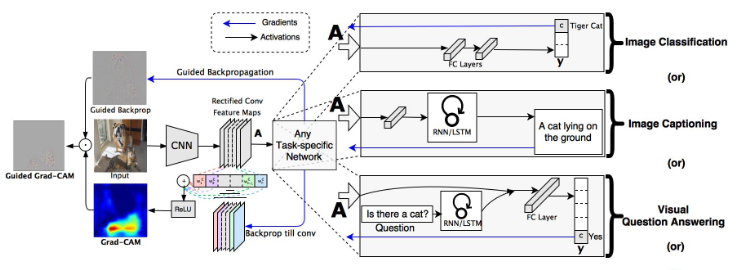

\
#### **How It Works:**

1. **Compute Gradients:** Backpropagate the gradients of a target class w.r.t. the final convolutional layer.

2. **Global Average Pooling:** Compute the average gradient for each feature map to obtain importance weights.

3. **Weighted Feature Maps:** Multiply these weights with the feature maps to generate an activation heatmap.

4. **Overlay on Image:** Upscale and overlay the heatmap on the original image for visualization.

##### **Use Cases:**
* Model explainability
* Debugging misclassifications
* Identifying biases in CNNs

In [ ]:
# We perform GradCam technique on the pretrained efficientnetb5 model
effnet_b5 = tf.keras.applications.efficientnet.EfficientNetB5(include_top = False,
                                                              weights = 'imagenet',
                                                              input_shape = (CONFIGURATION['IM_SIZE'], CONFIGURATION['IM_SIZE'], 3))

# Set trainable to False
effnet_b5.trainable = False

# Create the model using functional API
inputs = effnet_b5.inputs
x = effnet_b5.output

# Task specific layer
x = GlobalAveragePooling2D()(x)
x = Dense( CONFIGURATION["N_DENSE_1"], activation = "relu")(x)
x = Dense( CONFIGURATION["N_DENSE_2"], activation = "relu")(x)
output = Dense(CONFIGURATION["NUM_CLASSES"], activation = "softmax")(x)

effnetb5_pretrained_model = Model(inputs, output)
effnetb5_pretrained_model.summary()


115263384/115263384 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 256, 256, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 256, 256, 3)    │              7 │ rescaling_1[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_2 (Rescaling)   │ (None, 256, 256, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 257, 257, 3)    │              0 │ rescaling_2[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 128, 128, 48)   │          1,296 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 128, 128, 48)   │            192 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 128, 128, 48)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 128, 128, 48)   │            432 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 128, 128, 48)   │            192 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 128, 128, 48)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 48)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 48)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 12)       │            588 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 30,743,290 (117.28 MB)

 Trainable params: 2,229,763 (8.51 MB)

 Non-trainable params: 28,513,527 (108.77 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Text(0.5, 1.0, 'angry\n(1, 256, 256, 3)\nangry')

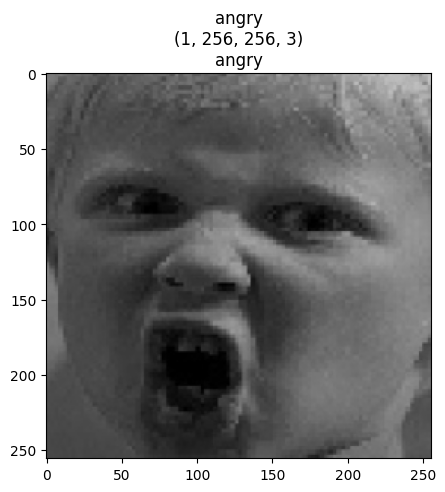

In [ ]:
# Let's pick a random image from the validation dataset
image_path = val_dir
random_path = random.choice([dirnames for (dirnames, _, _) in os.walk(val_dir)][1:])
test_image_path = random_path + '/' + random.choice(os.listdir(random_path))
test_image = cv2.imread(test_image_path)
read_image = cv2.resize(test_image, (CONFIGURATION['IM_SIZE'], CONFIGURATION['IM_SIZE'])) # Resizing to (256,256)
test_image_tensor = tf.constant(read_image, dtype = tf.float32)
test_image = tf.expand_dims(test_image_tensor, axis = 0)
actual_label = random_path.split('/')[-1]

# Now make prediction on the image
test_image_pred = feature_extraction_model.predict(resize_rescaling_layers(test_image))
pred_test_label = CLASS_NAMES[tf.argmax(test_image_pred[0]).numpy()]

# Plot image and check its shape
plt.figure(figsize = (5,5))
plt.imshow(test_image_tensor/255.)
plt.title(f'{actual_label}\n{test_image.shape}\n{pred_test_label}')

In [ ]:
# Name of the last convolutional layer in the pre-trained EfficientNetB5 model.
# This layer is typically the final activation layer before the global average pooling and classifier layers.
last_conv_layer_name = "top_activation"

# Retrieve the last convolutional layer from the pre-trained EfficientNetB5 model using its name.
last_conv_layer = effnetb5_pretrained_model.get_layer(last_conv_layer_name)

# Create a new model that outputs the activations of the last convolutional layer.
# This model takes the same inputs as the original EfficientNetB5 model and outputs the feature maps from the last convolutional layer.
last_conv_layer_model = Model(effnetb5_pretrained_model.inputs, last_conv_layer.output)

In [ ]:
# List of layer names in the classifier portion of the pre-trained EfficientNetB5 model.
# These layers include a Global Average Pooling layer and three Dense (fully connected) layers.
classifier_layer_names = [
    "global_average_pooling2d",  # Global Average Pooling layer to reduce spatial dimensions
    "dense",                     # First fully connected layer
    "dense_1",                   # Second fully connected layer
    "dense_2"                    # Third fully connected layer (output layer)
]

# Define the input shape for the classifier model.
# The input shape is (8, 8, 2048), which corresponds to the output shape of the last convolutional block in EfficientNetB5.
classifier_input = Input(shape=(8, 8, 2048))

# Start building the classifier model by passing the input through each layer.
x = classifier_input  # Initialize x with the input tensor

# Iterate through the list of classifier layer names and apply each layer to the input tensor.
for layer_name in classifier_layer_names:
    # Retrieve the layer by name from the pre-trained EfficientNetB5 model and apply it to x
    x = effnetb5_pretrained_model.get_layer(layer_name)(x)

# Create the classifier model using the Functional API.
# The model takes `classifier_input` as input and outputs the final tensor `x` after passing through all layers.
classifier_model = Model(classifier_input, x)

In [ ]:
with tf.GradientTape() as tape:
    # We are using tf.GradientTape to record the operations for automatic differentiation.
    # This allows us to calculate gradients later.

    # Get the output of the last convolutional layer.
    last_conv_layer_output = last_conv_layer_model(test_image)  # Shape: (1, H, W, C) - Batch size 1, Height, Width, Channels

    # Get the predictions from the classifier head.
    preds = classifier_model(last_conv_layer_output)  # Shape: (1, num_classes) - Batch size 1

    # Get the index of the top predicted class.
    top_pred_index = tf.argmax(preds[0]) # Shape: () - Scalar representing the class index

    print(top_pred_index) #Print the index of the top prediction

    # Extract the score (probability) of the top predicted class.
    # We use this as the target for gradient calculation.
    top_class_channel = preds[:, top_pred_index] # Shape: (1,) - Batch size 1, containing the score for the top class.

# Calculate the gradients of the top class score with respect to the
# output of the last convolutional layer. This tells us how much each
# activation in the last convolutional layer contributes to the
# prediction of the top class.
grads = tape.gradient(top_class_channel, last_conv_layer_output) # Shape: (1, H, W, C) - Same shape as last_conv_layer_output

# 'grads' now contains the gradients.  These gradients are crucial for
# visualizing what parts of the image are most influential for the model's
# decision (e.g., using Grad-CAM or similar techniques).  You would typically
# process 'grads' and 'last_conv_layer_output' further to create a heatmap
# or other visualization.

tf.Tensor(0, shape=(), dtype=int64)


In [ ]:
grads.shape

TensorShape([1, 8, 8, 2048])

In [ ]:
pooled_grads = tf.reduce_mean(grads, axis = (0,1,2)).numpy()
pooled_grads.shape[0]

2048

In [ ]:
# Convert the output of the last convolutional layer to a NumPy array and select the first item in the batch.
# This removes the batch dimension, leaving a 3D array (height, width, channels).
last_conv_layer_output = last_conv_layer_output.numpy()[0]

# Iterate over each channel in the pooled gradients.
# `pooled_grads.shape[0]` gives the number of channels in the pooled gradients.
for i in range(2048):
    # Multiply the feature map of the i-th channel in the last convolutional layer output
    # by the corresponding pooled gradient value.
    # This emphasizes the importance of each channel based on the gradient values.
    last_conv_layer_output[:, :, i] *= pooled_grads[i]

In [ ]:
print(last_conv_layer_output.shape)

(8, 8, 2048)


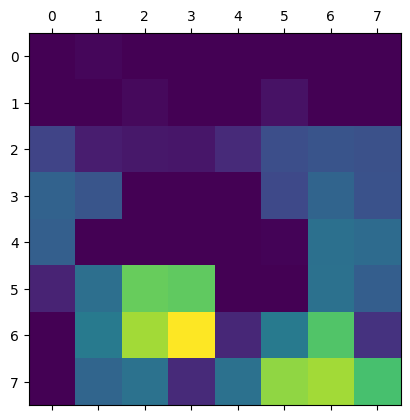

In [ ]:
# Lets visualize the heatmap
heatmap = np.sum(last_conv_layer_output, axis = -1)
heatmap = tf.nn.relu(heatmap)
plt.matshow(heatmap)

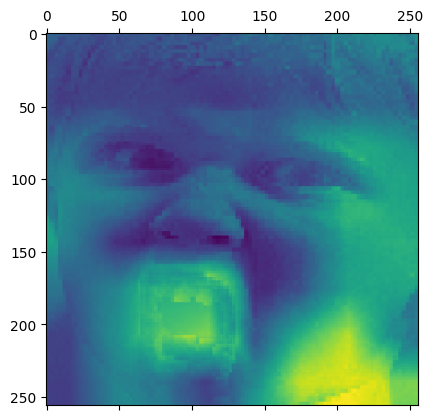

In [ ]:
resized_heatmap = cv2.resize(np.array(heatmap), (256, 256))
plt.matshow(resized_heatmap*255 + test_image[0,:,:,0]/255)

## 10. Ensembling

**Ensembling in Deep Learning**

Ensembling is a technique where multiple models (often called "base learners") are combined to improve the overall performance of a machine learning system. The idea is that by combining the predictions of several models, the strengths of each model can complement the weaknesses of others, leading to better accuracy, robustness, and generalization.

\
**How Does Ensembling Work?**
*  **Train Multiple Models:**
  
   Train several different models (e.g., neural networks with different architectures, or the same architecture trained with different initializations or data subsets).


* **Combine Predictions:**

  Combine the predictions of these models using a specific method, such as:

  1.  **Averaging:** Take the average of the predictions (common for regression tasks).

  2.  **Voting:** Use the majority vote (common for classification tasks).

  3.  **Weighted Averaging:** Assign different weights to each model's predictions based on their performance.

In [ ]:
lenet_model = tf.keras.models.load_model('/content/drive/MyDrive/HumanEmotionDetection/lenet_model.h5')
feature_extraction_model = tf.keras.models.load_model('/content/drive/MyDrive/HumanEmotionDetection/feature_extraction_model.h5')

In [ ]:
# Define the input layer
inputs = Input(shape = (CONFIGURATION['IM_SIZE'], CONFIGURATION['IM_SIZE'], 3))

# We will be using 2 different models to create the ensemble
model_1_output = lenet_model(inputs)
model_2_output = feature_extraction_model(inputs)

# Combine the outputs of both models and provide equal weightage
outputs = model_1_output * 0.5 + model_2_output * 0.5

# Create the ensemble model
ensemble_model = Model(inputs = inputs,
                       outputs = outputs,
                       name = 'EnsembleModel')

# Define loss function
loss_function = CategoricalCrossentropy()

# Define metrics
metrics = [CategoricalAccuracy(name = 'accuracy'), TopKCategoricalAccuracy(k=2, name = 'top_k_accuracy')]

# Compile the model
ensemble_model.compile(loss = loss_function,
                  optimizer = Adam(learning_rate = CONFIGURATION['LEARNING_RATE']*10),
                  metrics = metrics)

# Fit the model
ensemble_model_history = ensemble_model.fit(train_data_augment,
                               validation_data = val_data_augment,
                               validation_steps = int(len(val_data_augment) * 0.10),
                               epochs = CONFIGURATION['N_EPOCHS'], # *3 = 60 epochs
                               #callbacks = [checkpoint_callback]
                                            )


Epoch 1/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 130s 333ms/step - accuracy: 0.7499 - loss: 0.6021 - top_k_accuracy: 0.9268 - val_accuracy: 0.6562 - val_loss: 0.7500 - val_top_k_accuracy: 0.8884
Epoch 2/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 70s 148ms/step - accuracy: 0.8302 - loss: 0.4645 - top_k_accuracy: 0.9564 - val_accuracy: 0.7768 - val_loss: 0.6250 - val_top_k_accuracy: 0.9196
Epoch 3/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 41s 148ms/step - accuracy: 0.8722 - loss: 0.3719 - top_k_accuracy: 0.9688 - val_accuracy: 0.7634 - val_loss: 0.7291 - val_top_k_accuracy: 0.8973
Epoch 4/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 41s 192ms/step - accuracy: 0.8987 - loss: 0.3049 - top_k_accuracy: 0.9788 - val_accuracy: 0.7321 - val_loss: 0.6775 - val_top_k_accuracy: 0.9062
Epoch 5/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 41s 192ms/step - accuracy: 0.9136 - loss: 0.2671 - top_k_accuracy: 0.9850 - val_accuracy: 0.7634 - val_loss: 0.8173 - val_top_k_accuracy: 0.9152
Epoch 6/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 32s 152ms/step - accuracy: 0.9225 

### 10.1 Saving and Loading Ensemble Model

In [ ]:
import tensorflow as tf
import pickle

def save_ensemble_model(model, filepath):
  """
  Saves the ensemble model by pickling the model configuration and weights separately.

  Args:
    model: The ensemble model to save.
    filepath: The path to save the model.
  """
  # Save the model configuration as JSON
  with open(filepath + '.json', 'w') as f:
    f.write(model.to_json())

  # Save the model weights, ensuring the filename ends with '.weights.h5'
  model.save_weights(filepath + '.weights.h5') # Changed '.h5' to '.weights.h5'

def load_ensemble_model(filepath):
  """
  Loads the ensemble model from the saved configuration and weights.

  Args:
    filepath: The path to the saved model.

  Returns:
    The loaded ensemble model.
  """
  # Load the model configuration from JSON
  with open(filepath + '.json', 'r') as f:
    model_config = f.read()

  # Create a new model instance from the configuration
  model = tf.keras.models.model_from_json(model_config)

  # Load the model weights, ensuring the filename ends with '.weights.h5'
  model.load_weights(filepath + '.weights.h5') # Changed '.h5' to '.weights.h5'

  return model

In [ ]:
#save_ensemble_model(model = ensemble_model, filepath = '/content/drive/MyDrive/HumanEmotionDetection/')

In [ ]:
ensemble_model = load_ensemble_model('/content/drive/MyDrive/HumanEmotionDetection/')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 38 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# Evaluate the ensemble model
ensemble_model.evaluate(val_dataset)

72/72 ━━━━━━━━━━━━━━━━━━━━ 32s 213ms/step - accuracy: 0.7714 - loss: 0.7001 - top_k_accuracy: 0.9236


[0.706086277961731, 0.7835820913314819, 0.9253731369972229]

In [ ]:
# Make predictions on the validation dataset
y_true, y_preds = make_predictions(model = ensemble_model,
                                   dataset = val_dataset)

# Calculate results and store them in a variable
ensemble_model_results = calculate_results(y_true = y_true,
                                           y_preds = y_preds)
ensemble_model_results

{'accuracy': 0.7835820895522388,
 'precision': 0.7844744735759962,
 'recall': 0.7835820895522388,
 'f1_score': 0.7838595503872047}

## 11. Class Imbalance

**What is Class Imbalance?**
Class imbalance occurs when the **distribution of classes** in a dataset is not uniform. In other words, some classes have significantly more samples than others. For example:

* In a binary classification problem, 95% of the data might belong to Class A, and only 5% to Class B.

* In a multi-class problem, one class might have 1,000 samples, while another has only 10.

\
**Why is Class Imbalance a Problem?**
Class imbalance can cause several issues in machine learning:

1. **Bias Toward the Majority Class:**

  * Models tend to prioritize the majority class because it dominates the loss function during training.

  * Example: A model might achieve 95% accuracy by simply predicting the majority class every time, but this is useless for the minority class.

2. **Poor Generalization:**

  * The model may fail to learn meaningful patterns for the minority class due to insufficient data.

3. **Misleading Metrics:**

  * Accuracy can be misleading in imbalanced datasets. For example, a model that always predicts the majority class might have high accuracy but poor recall for the minority class.

4.  **Real-World Impact:**

  * In critical applications (e.g., fraud detection, medical diagnosis), the minority class is often the most important. Failing to detect it can have serious consequences.

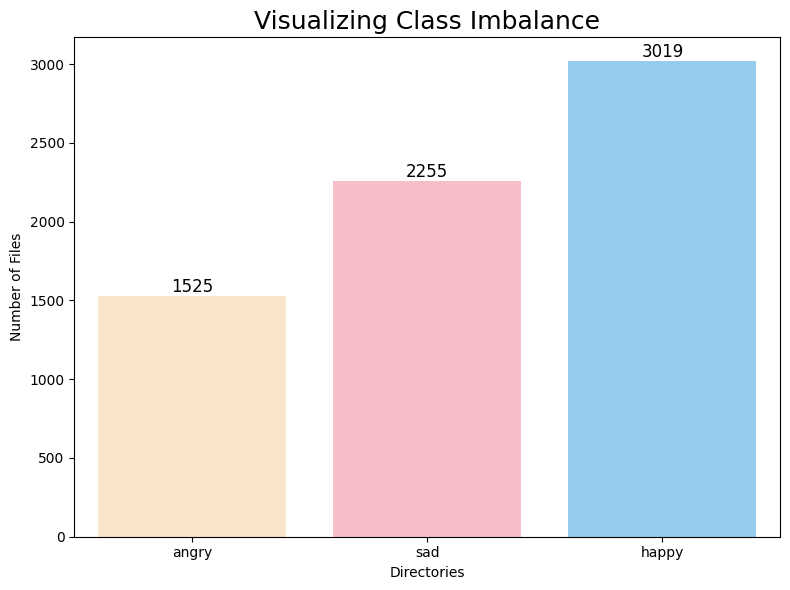

In [ ]:
path = pathlib.Path(train_dir)

# Initialize lists to store directory names and file counts
dirpaths = []
filelen = []

# Iterate through each directory in the training directory
for dir in path.glob('*'):
    if dir.is_dir():  # Ensure it's a directory
        dirpaths.append(dir.name)  # Get the directory name
        filelen.append(len(list(dir.glob('*'))))  # Count files in the directory

# Print results using a DataFrame
df = pandas.DataFrame(data={'Directories': dirpaths, 'Number of Files': filelen})

# Plot a graph to show values
plt.figure(figsize = (8, 6))
sns.barplot(x = df['Directories'],
            y = df['Number of Files'],
            hue = df['Directories'],
            palette = ['bisque', 'lightpink', 'lightskyblue'])

# Add text labels at the middle of each bar
for i, (directory, count) in enumerate(zip(df['Directories'], df['Number of Files'])):
    plt.text(i, count+0.001 * count, str(count), # Position text slightly above the bar
            ha='center', va='bottom',  # Center the text horizontally and vertically
            fontsize=12, color='black')  # Customize text appearance

plt.title('Visualizing Class Imbalance', fontsize = 18)
plt.tight_layout()
plt.show()

The data exhibits a significant class imbalance, with the distribution as follows: `'Angry' (1,525), 'Sad' (2,255), and 'Happy' (3,015).` This imbalance may introduce bias, causing the model to perform better on the 'Happy' class compared to the 'Angry' or 'Sad' classes. Addressing this imbalance is crucial to ensure fair and accurate predictions across all classes.

### 11.1 Class Weighting

The way we address the above problem in this notebook is by **Class Weighting.**

**Class weighting** is a technique used to address class imbalance in machine learning models. When one class has significantly more samples than others (e.g., more "Happy" samples than "Angry" or "Sad"), the model may become biased toward the majority class, leading to poor performance on minority classes. Class weighting helps mitigate this issue by assigning higher importance (or weight) to the minority classes during training.

**How Class Weighting Works:**
1. **Assigning Weights:**

  * Each class is assigned a weight inversely proportional to its frequency in the dataset. For example, if "Angry" has fewer samples than "Happy," it will be given a higher weight.

  * The weights are typically calculated as:

$$\text{Weight for class} = \frac{\text{Total samples}} {\text{ ( Number of classes
× Samples in class)}}$$


  * Alternatively, weights can be manually defined based on domain knowledge or experimentation.

2. Impact on Training:

  * During training, the loss function (e.g., cross-entropy loss) is modified to incorporate these weights. Errors made on minority classes are penalized more heavily, encouraging the model to pay more attention to them.

  * This helps balance the model's performance across all classes, even if the dataset is imbalanced.
  
* The weights could be calculated as:

$$\text{Weight for 'Angry'} =  \frac{1525 + 2255 + 3015)}{3 * 1525} ~ 1.48\\
\text{Weight for 'Sad'} =  \frac{1525 + 2255 + 3015)}{3 * 2255} ~ 1.00 \\
\text{Weight for 'Happy'} =  \frac{1525 + 2255 + 3015)}{3 * 3015} ~ 0.75$$

In [ ]:
n_samples_0 = 1525 # number of samples for class angry
n_samples_1 = 3019 # number of samples for class happy
n_samples_2 = 2255 # number of samples for class sad

total_samples = n_samples_0 + n_samples_1 + n_samples_2
total_classes = 3

# Lets calculate the weight of the class using the class weighting formula
class_weights = {0: total_samples/(total_classes * n_samples_0),
                 1: total_samples/(total_classes * n_samples_1),
                 2: total_samples/(total_classes * n_samples_2)
                 }

print(class_weights)

{0: 1.486120218579235, 1: 0.7506900739759302, 2: 1.0050258684405027}


In [ ]:
base_model.trainable = False

In [ ]:
# Apply the class weights on the pretrained model
base_model = tf.keras.applications.efficientnet.EfficientNetB5(include_top = False,
                                                               weights = 'imagenet',
                                                               input_shape = (CONFIGURATION['IM_SIZE'], CONFIGURATION['IM_SIZE'], 3))

# Build the model using the functional api
input = Input(shape = (CONFIGURATION['IM_SIZE'], CONFIGURATION['IM_SIZE'], 3))
x = base_model(input, training = False) # To ensure we are in inference mode
x = GlobalAveragePooling2D()(x)
x = Dense(CONFIGURATION['N_DENSE_1'], activation = 'relu')(x)
x = BatchNormalization()(x)
x = Dense(CONFIGURATION['N_DENSE_2'], activation = 'relu')(x)
output = Dense(CONFIGURATION['NUM_CLASSES'], activation = 'softmax')(x)

model_class_weights = Model(input, output, name = 'fine_tuned_model')
model_class_weights.summary()

Model: "fine_tuned_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb5 (Functional)          │ (None, 8, 8, 2048)          │      28,513,527 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,747,386 (117.29 MB)

 Trainable params: 30,572,595 (116.63 MB)

 Non-trainable params: 174,791 (682.78 KB)

In [ ]:
# Compile and train the model
loss_function = CategoricalCrossentropy()
metrics = [CategoricalAccuracy(name = 'accuracy'), TopKCategoricalAccuracy(k=2, name = "top_k_accuracy")]

model_class_weights.compile(loss = loss_function,
                            metrics = metrics,
                            optimizer = Adam(CONFIGURATION['LEARNING_RATE']))

model_class_weights_history = model_class_weights.fit(train_data,
                                                      validation_data = val_data,
                                                      epochs = CONFIGURATION['N_EPOCHS'],
                                                      class_weight = class_weights)

Epoch 1/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 425s 1s/step - accuracy: 0.6226 - loss: 1.0770 - top_k_accuracy: 0.8584 - val_accuracy: 0.4192 - val_loss: 1.5239 - val_top_k_accuracy: 0.7827
Epoch 2/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 134s 627ms/step - accuracy: 0.7047 - loss: 0.7688 - top_k_accuracy: 0.8934 - val_accuracy: 0.2524 - val_loss: 3.9604 - val_top_k_accuracy: 0.6163
Epoch 3/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 142s 630ms/step - accuracy: 0.7205 - loss: 0.7588 - top_k_accuracy: 0.8970 - val_accuracy: 0.6896 - val_loss: 0.8018 - val_top_k_accuracy: 0.8687
Epoch 4/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 144s 678ms/step - accuracy: 0.7856 - loss: 0.5725 - top_k_accuracy: 0.9275 - val_accuracy: 0.8556 - val_loss: 0.3963 - val_top_k_accuracy: 0.9504
Epoch 5/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 145s 679ms/step - accuracy: 0.8621 - loss: 0.3757 - top_k_accuracy: 0.9539 - val_accuracy: 0.8165 - val_loss: 0.5868 - val_top_k_accuracy: 0.9473
Epoch 6/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 202s 678ms/step - accuracy: 0.874

In [ ]:
# Store history in a json file
with open('/content/drive/MyDrive/HumanEmotionDetection/model_class_weights_history.json', 'w') as f:
    json.dump(model_class_weights_history.history, f)

In [ ]:
# Evaluate the model
model_class_weights.evaluate(val_data)

72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - accuracy: 0.8660 - loss: 0.5228 - top_k_accuracy: 0.9602


[0.5092734098434448, 0.8709394335746765, 0.9631255269050598]

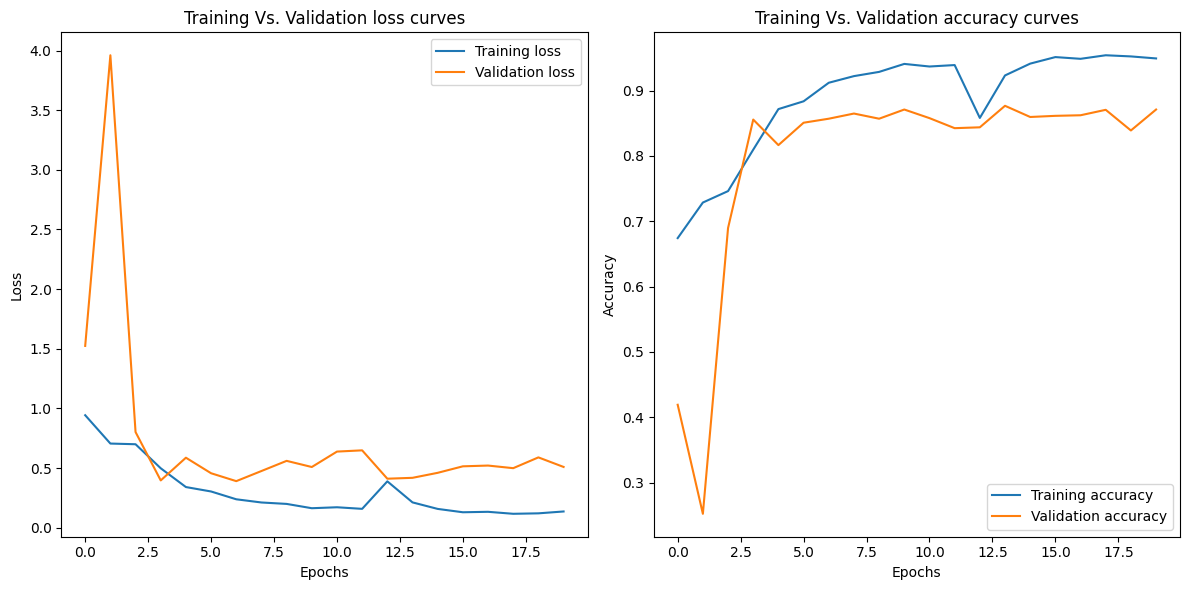

In [ ]:
# Plot loss curves
plot_loss_curves(history = model_class_weights_history, classification = True, val_data = True)

In [ ]:
#model_class_weights.save('/content/drive/MyDrive/HumanEmotionDetection/model_class_weights.h5')
model_class_weights = tf.keras.models.load_model('/content/drive/MyDrive/HumanEmotionDetection/model_class_weights.h5')

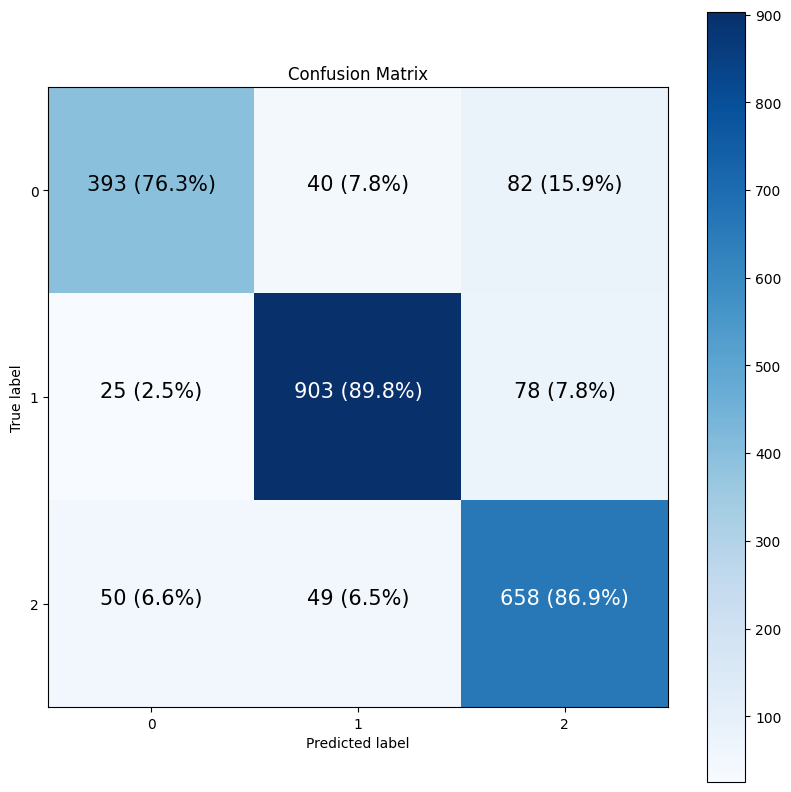

In [ ]:
# Make predictions and plot confusion matrix
y_true, y_preds = make_predictions(model = model_class_weights,
                                   dataset = val_data)
make_confusion_matrix(y_true = y_true,
                      y_pred = y_preds)

In [ ]:
# Calculate the results
class_weights_model_result = calculate_results(y_true= y_true,
                                               y_preds = y_preds)
class_weights_model_result

{'accuracy': 0.8577699736611062,
 'precision': 0.8591498861602942,
 'recall': 0.8577699736611062,
 'f1_score': 0.8576090080418359}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


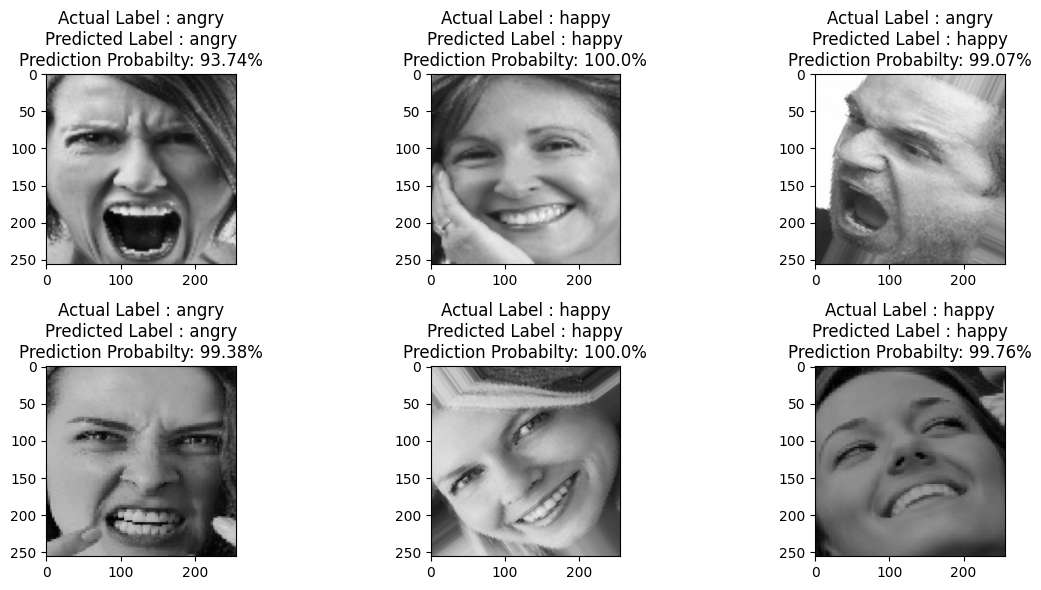

In [ ]:
make_prediction_random_images(model = model_class_weights,
                              data_dir = val_dir)

## 12. Vision Transformer

### **Vision Transformers (ViTs): Revolutionizing Computer Vision with Transformer Architecture**

**Vision Transformers (ViTs)** represent a groundbreaking shift in the field of computer vision by adapting the Transformer architecture, originally designed for natural language processing (NLP), to image-based tasks. Introduced in the paper "An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale" by Dosovitskiy et al. (2020), ViTs have demonstrated remarkable performance in image classification, object detection, segmentation, and other visual tasks, often rivaling or surpassing traditional convolutional neural networks (CNNs).

### Key Concepts of Vision Transformers:
1. **Transformer Architecture:**

  * ViTs leverage the self-attention mechanism of Transformers, which allows the model to focus on different parts of an image dynamically, capturing both local and global dependencies.

  * Unlike CNNs, which rely on convolutional filters to extract hierarchical features, ViTs process images as sequences of patches, treating them similarly to tokens in NLP.

2. **Patch Embeddings**:

  * An input image is divided into fixed-size patches (e.g., 16x16 pixels), which are then flattened and linearly projected into a lower-dimensional embedding space.

  * These patch embeddings, along with positional encodings to retain spatial information, are fed into the Transformer encoder.

3. **Self-Attention Mechanism:**

  * The self-attention mechanism enables the model to weigh the importance of different patches relative to one another, allowing it to capture complex relationships and patterns in the image.

4. **Scalability and Pretraining:**

  * ViTs benefit from large-scale pretraining on massive datasets (e.g., ImageNet-21k or JFT-300M), which helps them generalize well to downstream tasks.

  * Their scalability makes them particularly effective when trained on large amounts of data, often outperforming CNNs in such scenarios.

\
The main things we'll be paying attention to are:
1. **Layers** - takes an **input**, performs an operation or function on the input, produces an **output**.
2. **Blocks** - a collection of layers, which in turn also takes an **input** and produces an **output**.

<img src="https://github.com/krutika-shimpi/Human_Emotion_Detection_Project/raw/main/ViT_architecture.png" width=900 alt="figure 1 from the original vision transformer paper"/>

*Figure 1 from the ViT Paper showcasing the different inputs, outputs, layers and blocks that create the architecture. Our goal will be to replicate each of these using TensorFlow code.*

The ViT architecture is comprised of several stages:
* **Patch + Position Embedding (inputs)** - Turns the input image into a sequence of image patches and adds a position number to specify in what order the patch comes in.

* **Linear projection of flattened patches (Embedded Patches)** - The image patches get turned into an **embedding**, the benefit of using an embedding rather than just the image values is that an embedding is a *learnable* representation (typically in the form of a vector) of the image that can improve with training.

* **Norm** - This is short for "[Layer Normalization](https://paperswithcode.com/method/layer-normalization)" or "LayerNorm", a technique for regularizing (reducing overfitting) a neural network, you can use LayerNorm.

* **Multi-Head Attention** - This is a [Multi-Headed Self-Attention layer](https://paperswithcode.com/method/multi-head-attention) or "MSA" for short. You can create an MSA layer.

* **MLP (or [Multilayer perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron))** - A MLP can often refer to any collection of feedforward layers. In the ViT Paper, the authors refer to the MLP as "MLP block" and it contains two layers with a non-linearity activation in between them and a Dropout layer.

* **Transformer Encoder** - The Transformer Encoder, is a collection of the layers listed above. There are two skip connections inside the Transformer encoder (the "+" symbols) meaning the layer's inputs are fed directly to immediate layers as well as subsequent layers. The overall ViT architecture is comprised of a number of Transformer encoders stacked on top of eachother.

* **MLP Head** - This is the output layer of the architecture, it converts the learned features of an input to a class output. Since we're working on image classification, you could also call this the "classifier head". The structure of the MLP Head is similar to the MLP block.

### 12.1 Creating Patches

In the **Vision Transformer (ViT)** paper, **patches** play a central role in adapting the Transformer architecture, originally designed for natural language processing (NLP), to image data. Let’s break down the role of patches in the Vision Transformer:

1. **Dividing the Image into Patches**
  * In NLP, Transformers process sequences of tokens (e.g., words or subwords). Similarly, in ViT, an image is divided into smaller **fixed-size patches**, which are treated as "visual tokens."

  * For example, a 256x256 pixel image can be divided into 16x16 patches, resulting in 256 patches (each of size 16x16 pixels).

2. **Flattening Patches into Vectors**
  * Each patch is flattened into a 1D vector. For example, a 16x16 patch with 3 color channels (RGB) becomes a vector of size 768 (16x16x3 = 768).

  * These flattened patches are analogous to word embeddings in NLP.

3. **Linear Projection (Patch Embeddings)**
  * The flattened patches are passed through a **learnable linear projection** to map them into a lower-dimensional embedding space.

  * This step is similar to how word embeddings are projected into a fixed-size vector space in NLP.

4. **Adding Positional Embeddings**
  * Unlike CNNs, which inherently capture spatial information through convolutional operations, Transformers have no built-in notion of **spatial structure**.

  * To provide spatial information, positional embeddings are added to the patch embeddings. These embeddings encode the position of each patch in the original image.

5. **Feeding Patches into the Transformer**
  * The sequence of patch embeddings (with positional embeddings) is fed into a standard Transformer encoder.

  * The Transformer processes the patches as a sequence, using self-attention to capture relationships between patches, both locally and globally.

6. **Output and Classification**
  * The output of the Transformer encoder is a sequence of feature vectors, one for each patch.

  * A **special classification token** (similar to the [CLS] token in BERT) is prepended to the sequence. The final hidden state of this token is used for image classification.

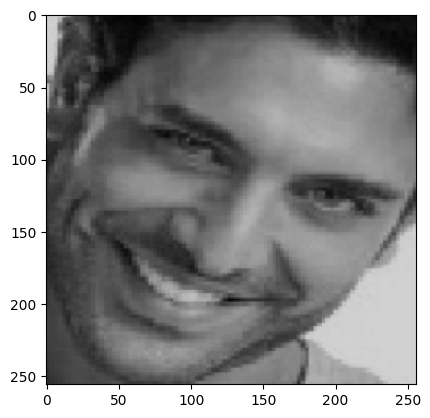

In [ ]:
# Take a test image and plot it
image_paths = random.choice([path for path,_,_ in os.walk(val_dir)][1:])
test_image_name = random.choice(os.listdir(image_paths))
test_image_path = image_paths + '/' + test_image_name
test_image = cv2.imread(test_image_path)
test_image = cv2.resize(test_image,(CONFIGURATION['IM_SIZE'], CONFIGURATION['IM_SIZE']))
plt.imshow(test_image)
plt.show()

1. `tf.image.extract_patches():`

  *  This function is used to extract small patches (16x16 pixels) from the image.

  *  The image is passed as input, and the function cuts it into smaller pieces based on the specified patch size and stride.

  **Parameters:**

    * **images:** The input image. Here, tf.expand_dims(test_image, axis=0) is used to add a batch dimension (required by TensorFlow).

    * **sizes:** The size of the patches. Here, it's [1, 16, 16, 1], meaning 16x16 patches.

    * **strides:** How much to move the window for the next patch. Here, it's [1, 16, 16, 1], meaning the window moves 16 pixels at a time (no overlap).

    * **rates:** Controls how the patches are sampled. [1, 1, 1, 1] means no skipping.

  * **padding:** 'VALID' means no padding is added to the image.

  **Output:**

    * The patches variable contains all the 16x16 patches extracted from the image.


2. `print(patches.shape):`

  * This prints the shape of the patches tensor. For example, if the input image is 256x256 pixels, the output shape might be (1, 16, 16, 768):

    * `1:` Batch size (1 image).

    * `16, 16:` Number of patches along the height and width of the image.

    * `768:` Each patch is 16x16 pixels with 3 color channels (RGB), so 16x16x3 = 768.


  
  **Q. What is the rates parameter?**

1. The rates parameter controls the sampling rate for extracting patches.

2. It is a list of 4 values, corresponding to the batch, height, width, and depth (channels) dimensions of the input image.

3. The default value is [1, 1, 1, 1], which means no skipping (normal patch extraction).



In [17]:
# Create patches of 16x16 with the stride of 16
patches = tf.image.extract_patches(images = tf.expand_dims(test_image, axis = 0),
                                   sizes = [1, CONFIGURATION['PATCH_SIZE'], CONFIGURATION['PATCH_SIZE'], 1],
                                   strides = [1, CONFIGURATION['PATCH_SIZE'], CONFIGURATION['PATCH_SIZE'], 1],
                                   rates = [1, 1, 1, 1],
                                   padding = 'VALID')
print(patches.shape)

NameError: name 'test_image' is not defined

In [18]:
patches = tf.reshape(patches, (patches.shape[0], -1, 768))
print(patches.shape)

NameError: name 'patches' is not defined

In [19]:
# Lets plot the patches
plt.figure(figsize = (8,8))
k = 0

for i in range(patches.shape[1]):
    ax = plt.subplot(16, 16, i+1)
    plt.imshow(tf.reshape(patches[0, i, :], (16, 16, 3)))
    plt.axis('off')

NameError: name 'patches' is not defined

<Figure size 800x800 with 0 Axes>

### 12.2 Positional Embedding

#### **What is the Embedding Layer Doing?**

The embedding layer is used to create positional embeddings for the patches of an image. In Vision Transformers, positional embeddings are added to patch embeddings to provide the model with information about the spatial location of each patch in the original image.

```
# (BatchSize, NumPatches, HiddenDimensions)
tf.keras.layers.Embedding(
    input_dim = 256, # Total unique values (Number of Patches)
    output_dim = 768 # Size of the output embedding vector
    )
```
1. **Parameters:**
  * `input_dim=256:`

    * This represents the total number of unique positions (or patches) in the input.

    * For example, if an image is divided into 16x16 patches, there are 256 patches in total.

    * The embedding layer will create a unique embedding vector for each of these 256 positions.

  * `output_dim=768:`

    * This is the size of the embedding vector for each position.

    * In Vision Transformers, this matches the size of the patch embeddings (e.g., 16x16x3 = 768 for a 16x16 patch with 3 color channels).
    
  
2. **Output Shape:**

  * The output of the embedding layer will have the shape:
  `(BatchSize, NumPatches, HiddenDimensions)`

    * `BatchSize:` The number of images in the batch (e.g., 1, 32, 64, etc.).

    * `NumPatches:` The total number of patches per image (e.g., 256 for a 16x16 grid of patches).

    * `HiddenDimensions:` The size of the embedding vector for each patch (e.g., 768).

In [22]:
# Create a PatchEncoder Layer
class PatchEncoder(Layer):
  def __init__(self, N_PATCHES, HIDDEN_SIZE):
    super(PatchEncoder, self).__init__(name='PatchEncoder')

    # Linear projection layer to map patches to the hidden size
    self.linear_projection = Dense(HIDDEN_SIZE)

    # Positional embedding layer to add spatial information
    self.positional_embedding = Embedding(
        input_dim=N_PATCHES,  # Total number of patches (unique positions)
        output_dim=HIDDEN_SIZE  # Size of the output embedding vector
    )

    # Store the number of patches
    self.N_PATCHES = N_PATCHES

  def call(self, x, training=True):
    # Extract patches from the input image
    patches = tf.image.extract_patches(
        images=x,  # Input image tensor
        sizes=[1, CONFIGURATION['PATCH_SIZE'], CONFIGURATION['PATCH_SIZE'], 1],  # Patch size (e.g., 16x16)
        strides=[1, CONFIGURATION['PATCH_SIZE'], CONFIGURATION['PATCH_SIZE'], 1],  # Stride (no overlap)
        rates=[1, 1, 1, 1],  # Sampling rate (no skipping)
        padding='VALID'  # No padding
    )

    # Reshape the extracted patches
    # Flatten the spatial dimensions (height, width) into a single dimension
    patches = tf.reshape(patches, (patches.shape[0], -1, patches.shape[-1]))

    # Create positional embedding input (indices for each patch)
    embedding_input = tf.range(
        start=0,  # Start index
        limit=self.N_PATCHES,  # End index (total number of patches)
        delta=1  # Step size
    )

    # Combine patch embeddings and positional embeddings
    # Linear projection of patches + positional embeddings
    output = self.linear_projection(patches) + self.positional_embedding(embedding_input)

    return output


# Test the PatchEncoder
# Create an instance of the PatchEncoder layer
patch_enc = PatchEncoder(256, 768)  # 256 patches, 768 hidden size

# Pass a dummy input (1 image of size 256x256 with 3 color channels)
patch_enc(tf.zeros((1, 256, 256, 3)))

<tf.Tensor: shape=(1, 256, 768), dtype=float32, numpy=
array([[[-0.01333237,  0.0024693 ,  0.04770589, ..., -0.01875647,
          0.00803326,  0.04745695],
        [-0.03778601, -0.01799964, -0.00362562, ..., -0.00388439,
          0.03279868, -0.03620863],
        [-0.04805967,  0.03557544,  0.02022243, ..., -0.03817194,
          0.03792869,  0.02012277],
        ...,
        [-0.00768415,  0.00881801, -0.00776273, ...,  0.03618358,
         -0.02304103, -0.0286075 ],
        [-0.02267376,  0.00944423, -0.0460176 , ...,  0.03486219,
         -0.00664288, -0.02422953],
        [-0.02468181, -0.01698575,  0.03319894, ..., -0.01933659,
          0.01234738,  0.0305883 ]]], dtype=float32)>

### 12.3 Transformer Encoder Layer

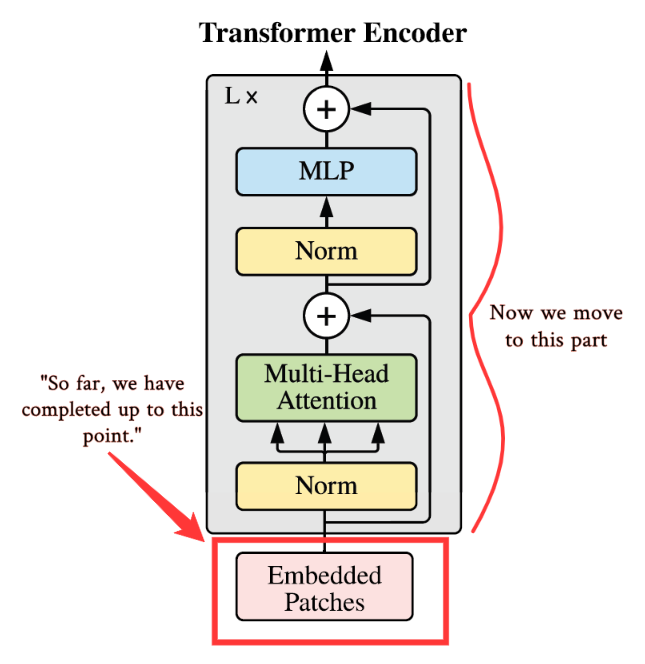

In [ ]:
# Create a TransformerEncoder Layer
class TransformerEncoder(Layer):
  def __init__(self, N_HEADS, HIDDEN_SIZE):
    super(TransformerEncoder, self).__init__(name = 'TransformerEncoder')

    self.layer_norm_1 = LayerNormalization()
    self.layer_norm_2 = LayerNormalization()
    self.multi_head_attn = MultiHeadAttention(N_HEADS, HIDDEN_SIZE)
    self.dense_1 = Dense(HIDDEN_SIZE, activation = tf.nn.gelu)
    self.dense_2 = Dense(HIDDEN_SIZE, activation = tf.nn.gelu)


  def call(self, input, training = True):
    x_1 = self.layer_norm_1(input)
    x_1 = self.multi_head_attn(x_1, x_1)

    x_1 = Add([x_1, input])

    x_2 = self.layer_norm_2(x_1)
    x_2 = self.dense_1(x_2)
    output = self.dense_2(x_2)
    output = Add()[output, x_1]

  return output

# Test the TransformerEncoder
trans_enc = TransformerEncoder(8, 768)
trans_enc(tf.zeros((1, 256, 768)))

## TensorFlow Records

* Why TensorFlow Records?

`TFRecord (TensorFlow Records)` is a binary file format used to store large amounts of structured data efficiently for TensorFlow training. It offers:

* Efficiency: Stores data in a compact, serialized format, reducing I/O overhead.
* Faster Data Loading: Works well with tf.data API for efficient input pipelines.
* Flexibility: Supports images, text, and structured data using tf.train.Example.

`Compression:` Can use GZIP or ZLIB to reduce storage size.
🔹 Example Workflow:

1. Convert data into `tf.train.Example`.
2. Write to a `.tfrecord` file.
3. Read using `tf.data.TFRecordDataset.`

In [ ]:
# Convert batched datasets into individual elements, which is useful before serializing them into TFRecord format.
training_dataset = train_dataset.unbatch()
validation_dataset = val_dataset.unbatch()

In [ ]:
def create_example(image, label):
    """
    Converts an image and label into a serialized TFRecord example.

    Args:
        image (bytes): The raw image data in byte format.
        label (numpy array): One-hot encoded label.

    Returns:
        Serialized Example in TFRecord format.
    """

    # Convert the image to a bytes feature (stores raw image data as bytes)
    bytes_feature = Feature(
        bytes_list=BytesList(value=[image])
    )

    # Convert the label to an integer feature (stores the class index)
    int_feature = Feature(
        int64_list=Int64List(value=[np.argmax(label)])  # Convert one-hot to class index
    )

    # Create a TFRecord Example containing image and label features
    example = Example(
        features=Features(
            feature={
                'images': bytes_feature,
                'labels': int_feature
            }
        )
    )

    # Serialize the Example to a string format for storage in TFRecord
    return example.SerializeToString()


In [ ]:
# Define the number of shards (separate TFRecord files) to split the dataset into
NUM_SHARDS = 10

# Define the file path format for storing each shard
# {:02d} ensures shard indices are zero-padded (e.g., 'shard_00.tfrecord', 'shard_01.tfrecord', ...)
PATH = 'tfrecords/shard_{:02d}.tfrecord'


In [ ]:
def encode_image(image, label):
    """
    Encodes an image as a JPEG format for storage in TFRecord.

    Args:
        image (Tensor): Input image tensor.
        label (Tensor): Corresponding label.

    Returns:
        Tuple (encoded image as bytes, label).
    """

    # Cast the image to tf.uint8 to ensure proper encoding
    image = tf.cast(image, tf.uint8)

    # Encode the image in JPEG format to reduce storage size
    image = tf.io.encode_jpeg(image)

    # Return the encoded image and the label
    return image, label


In [ ]:
# Apply the encode_image function to every element in training_dataset.
encoded_dataset = training_dataset.map(encode_image)

In [ ]:
import os  # Ensure os module is imported

# Create the 'tfrecords' directory if it doesn't exist
# `exist_ok=True` prevents errors if the directory already exists
os.makedirs('tfrecords', exist_ok=True)

# Iterate over the number of shards to split the dataset
for shard_number in range(NUM_SHARDS):

    # Split the dataset into `NUM_SHARDS` parts
    # Each shard contains a subset of the dataset
    sharded_dataset = (
        encoded_dataset
        .shard(NUM_SHARDS, shard_number)  # Assigns each example to a specific shard
        .as_numpy_iterator()  # Converts the dataset to an iterator for easier processing
    )

    # Open a TFRecord file for the current shard
    with tf.io.TFRecordWriter(PATH.format(shard_number)) as file_writer:

        # Iterate through the examples in the current shard
        for image, label in sharded_dataset:

            # Serialize and write the example to the TFRecord file
            file_writer.write(create_example(image, label))


If you want to write the records onto drive refer below code

In [ ]:
# from google.colab import drive
# import os
# import tensorflow as tf

# # Mount Google Drive
# drive.mount('/content/drive')

# # Define the Google Drive path for saving TFRecords
# GDRIVE_PATH = '/content/drive/My Drive/tfrecords'

# # Create the directory in Google Drive if it doesn't exist
# os.makedirs(GDRIVE_PATH, exist_ok=True)

# # Iterate over the number of shards to split the dataset
# for shard_number in range(NUM_SHARDS):

#     # Split the dataset into `NUM_SHARDS` parts
#     sharded_dataset = (
#         encoded_dataset
#         .shard(NUM_SHARDS, shard_number)
#         .as_numpy_iterator()
#     )

#     # Define the full path for each TFRecord file
#     shard_path = os.path.join(GDRIVE_PATH, f'shard_{shard_number:02d}.tfrecord')

#     # Write the TFRecord file to Google Drive
#     with tf.io.TFRecordWriter(shard_path) as file_writer:
#         for image, label in sharded_dataset:
#             file_writer.write(create_example(image, label))

# print(f"TFRecords saved in {GDRIVE_PATH}")


In [ ]:
# Create a TensorFlow dataset by reading the TFRecord files
recons_dataset = tf.data.TFRecordDataset(
    filenames=[PATH.format(p) for p in range(NUM_SHARDS)]
)


In [ ]:
def parse_tfrecords(example):
    """
    Parses a single TFRecord example into an image and label.

    Args:
        example (tf.Tensor): A serialized TFRecord example.

    Returns:
        Tuple (decoded image as float32, integer label).
    """

    # Define the structure of the stored TFRecord features
    feature_description = {
        "images": tf.io.FixedLenFeature([], tf.string),  # Image stored as a byte string
        "labels": tf.io.FixedLenFeature([], tf.int64)    # Label stored as an integer
    }

    # Parse the serialized example to extract features
    example = tf.io.parse_single_example(example, feature_description)

    # Decode the JPEG image and convert it to float32 (values scaled to [0,1])
    example["images"] = tf.image.convert_image_dtype(
        tf.io.decode_jpeg(
            example["images"],  # Decode the stored JPEG image
            channels=3  # Ensure it's a 3-channel RGB image
        ),
        dtype=tf.float32  # Normalize pixel values to range [0,1]
    )

    # Return the decoded image and its corresponding label
    return example['images'], example['labels']


Reading TensorFlow records from google drive

In [ ]:
# from google.colab import drive
# import tensorflow as tf
# import os

# # Mount Google Drive to access files
# drive.mount('/content/drive')

# # Define the path where your TFRecord files are stored in Google Drive
# GDRIVE_PATH = '/content/drive/My Drive/tfrecords'

# # List of TFRecord file paths in Google Drive
# filenames = [os.path.join(GDRIVE_PATH, f'shard_{p:02d}.tfrecord') for p in range(NUM_SHARDS)]

# # Create a TFRecordDataset to read from Google Drive
# recons_dataset = tf.data.TFRecordDataset(filenames=filenames)

# # Define the parsing function (same as before)
# def parse_tfrecords(example):
#     """
#     Parses a single TFRecord example into an image and label.

#     Args:
#         example (tf.Tensor): A serialized TFRecord example.

#     Returns:
#         Tuple (decoded image as float32, integer label).
#     """
#     feature_description = {
#         "images": tf.io.FixedLenFeature([], tf.string),
#         "labels": tf.io.FixedLenFeature([], tf.int64),
#     }

#     # Parse the serialized example to extract features
#     example = tf.io.parse_single_example(example, feature_description)

#     # Decode the JPEG image and convert it to float32
#     example["images"] = tf.image.convert_image_dtype(
#         tf.io.decode_jpeg(example["images"], channels=3),
#         dtype=tf.float32
#     )

#     return example['images'], example['labels']

# # Apply the parsing function to the dataset
# parsed_dataset = recons_dataset.map(parse_tfrecords)

# # Example: Iterate through the dataset and fetch parsed images and labels
# for image, label in parsed_dataset.take(1):
#     print(image.shape, label)


In [ ]:
# Parse the TFRecord dataset, batch it, and prefetch it for efficient training
parsed_dataset = (
    recons_dataset  # The original dataset loaded from TFRecord files

    # Apply the `parse_tfrecords` function to decode each record (image and label)
    .map(parse_tfrecords)  # Maps the parse function to the dataset

    # Group the parsed data into batches for more efficient processing during training
    .batch(CONFIGURATION["BATCH_SIZE"])  # Batches the dataset with the specified batch size

    # Prefetch the next batch of data while training on the current batch, improving throughput
    .prefetch(tf.data.AUTOTUNE)  # Automatically tunes the prefetch buffer size for optimal performance
)


In [ ]:
# Lets create Lenet Model for TensorFlow Records
lenet_model_tfrecords = tf.keras.models.Sequential([
    InputLayer(shape = (CONFIGURATION['IM_SIZE'], CONFIGURATION['IM_SIZE'], 3)),
    resize_rescaling_layers,

    # 1st Conv2D Layer
    Conv2D(filters = CONFIGURATION['N_FILTERS'],
           kernel_size = CONFIGURATION['KERNEL_SIZE'],
           strides = CONFIGURATION['N_STRIDES'],
           kernel_regularizer = L2(CONFIGURATION['REGULARIZATION_RATE']),
           activation = 'relu'),

    BatchNormalization(),
    MaxPool2D(pool_size = CONFIGURATION['POOL_SIZE'],
              strides = CONFIGURATION['N_STRIDES'] * 2),
    Dropout(rate = CONFIGURATION['DROPOUT_RATE']),

    # 2nd Conv2D Layer
    Conv2D(filters = CONFIGURATION['N_FILTERS'] * 2 + 4,
           kernel_size = CONFIGURATION['KERNEL_SIZE'],
           strides = CONFIGURATION['N_STRIDES'],
           kernel_regularizer = L2(CONFIGURATION['REGULARIZATION_RATE']),
           activation = 'relu'),

    BatchNormalization(),
    MaxPool2D(pool_size = CONFIGURATION['POOL_SIZE'],
              strides = CONFIGURATION['N_STRIDES'] * 2),

    # Flatten Layer
    Flatten(),

    # 1st Dense Layer
    Dense(units = CONFIGURATION['N_DENSE_1'],
          activation = 'relu',
          kernel_regularizer = L2(CONFIGURATION['REGULARIZATION_RATE'])),

    BatchNormalization(),
    Dropout(rate = CONFIGURATION['DROPOUT_RATE']),

    # 2nd Dense Layer
    Dense(units = CONFIGURATION['N_DENSE_2'],
          activation = 'relu',
          kernel_regularizer = L2(CONFIGURATION['REGULARIZATION_RATE'])),

    BatchNormalization(),

    # Output Layer
    Dense(units = CONFIGURATION['NUM_CLASSES'],
          activation = 'softmax')
])

lenet_model_cutmix.summary()

In [ ]:
# Compile the model
loss_function = SparseCategoricalCrossentropy()
metrics = [SparseCategoricalAccuracy(name = 'accuracy')]

lenet_model_tfrecords.compile(
    optimizer = Adam(learning_rate = CONFIGURATION['LEARNING_RATE']),
    loss = loss_function,
    metrics = metrics
)

In [ ]:
# Fit the model
lenet_history_tfrecords = lenet_model_tfrecords.fit(
    parsed_dataset,
    epochs = CONFIGURATION['N_EPOCHS'],
    verbose = 1
)